# Capstone 3: Data Wrangling and EDA

## Data Wrangling

### Load and inspect the data

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data
df = pd.read_csv('../data/raw/caravan-insurance-challenge.csv')

In [3]:
# Check dimesions of the data
df.shape

(9822, 87)

In [4]:
# Examine the first few rows of the dataframe.
pd.set_option('display.max_columns', None)
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
# Check data types of each column, and do an initial check for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

It appears that all of our columns are stored as integers, except for ORIGIN. We note that these columns are actually categorical. However, the encoding as integers may be useful later on, so we leave them encoded that way for now. 

According to the codebook the ORIGIN column is only relevant to a specific Kaggle competition. We drop this column.

In [6]:
# Drop the 'origin' column.
df = df.drop('ORIGIN', axis=1)

### Check for missing values

In [7]:
# Confirm there are no null values.
print("This data set contains {} values coded as None or NaN.".format(sum(df.isna().any())))

This data set contains 0 values coded as None or NaN.


It's possible that there are some missing values, which happen to be coded as something other than `None` or `NaN`. We will return to this problem later, when we check for values not in the codebook.

### Check for duplicate rows

In [8]:
print('This data set has {} rows which are duplicates.'.format(df.duplicated().sum()))

This data set has 1442 rows which are duplicates.


It looks like duplicate rows account for a significant portion of our data. Before deciding whether to drop duplicate rows, we do a bit more exploration.

First, let's find the average number of times duplicate rows are copied.

In [9]:
# Take subset of data containing all duplicated rows
dupes = df[df.duplicated(keep=False)]
# Save one copy of each duplicated row
dupes_unique = dupes.drop_duplicates()

# Find the average number of times a duplicate row is repeated
dupes_rate = dupes.shape[0]/dupes_unique.shape[0]

print('On average, a duplicated row is repeated {:0.02} times'.format(dupes_rate))

On average, a duplicated row is repeated 2.4 times


It looks like rows are, on average, only repeated a few of times. This makes it more plausible that duplicates are coming from different postal codes which genuinely have the same characteristics. On the other hand, it also seems that dropping duplicates won't wildly alter the distribution of values in our data set. So, I will go ahead and drop them.

In [10]:
df = df.drop_duplicates()

### Check for invalid values

The code book gives lists of possible values for each column. We first define all lists of keys given in the code book.

In [11]:
vals_maanthui = range(1, 11)
vals_mgemomv = range(1, 7)
L0 = range(1, 42)
L1 = range(1, 7)
L2 = range(1, 11)
L3_and_L4 = range(0, 10)

Next, we create a dictionary which pairs each column with its list of possible values.

In [12]:
feature_list = df.columns
special_cols = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD']
other_cols = [col for col in feature_list if col not in special_cols]

feature_keys = {
    'MOSTYPE': L0,
    'MAANTHUI': vals_maanthui,
    'MGEMOMV': vals_mgemomv,
    'MGEMLEEF': L1,
    'MOSHOOFD': L2
}

for col in other_cols:
    feature_keys[col] = L3_and_L4

In [13]:
def check_values(col_name, good_vals):
    return df[col_name].apply(lambda x: x not in good_vals).sum()

In [14]:
for col, val_list in feature_keys.items():
    num_bad = check_values(col, val_list)
    if num_bad > 0:
        print('Column:', col, 'Bad values:', num_bad)

Column: APERSAUT Bad values: 1


It looks like there's only one row with an invalid value! Let's drop it.

In [15]:
df = df[df['APERSAUT'].apply(lambda x: x in L3_and_L4)]

### Check for very rare categories

Since all of the columns are categorical, with a finite list of possible values, we do not need to worry about outliers per se. However, cateogories with very few values may be a problem. 

For example, to run a $ \chi $-squared test, we need an expected frequency of at least 5 for Caravan ownership in almost every cell cell of the contingency table. Since the proportion of codes with at least one caravan policy is about 0.06, that means we need a minimum of about 85 rows per level of in each category.

#### Rare categories for nominal variables

First we will look at nominal (unordered) variables. These are 'MOSHOOFD' (customer main type) and 'MOSTYPE' (customer subtype). Each 'MOSHOOFD' level should correspond to several 'MOSTYPE' levels. We inspect the values of the two variables to check that this is so.

In [16]:
df.groupby(['MOSHOOFD', 'MOSTYPE']).size()

MOSHOOFD  MOSTYPE
1         1           199
          2           118
          3           396
          4            81
          5            66
2         6           184
          7            68
          8           482
3         9           374
          10          239
          11          248
          12          163
          13          262
4         15            5
          16           25
          17           12
          18           27
          19            7
5         20           37
          21           23
          22          137
          23          311
          24          269
6         25          122
          26           70
          27           61
          28           34
7         29          121
          30          165
          31          269
          32          207
8         33         1133
          34          245
          35          309
          36          327
          37          208
9         38          479
          39        

We will later use the $ \chi $-squared test to assess the relationships between each nominal variable and the target, so we need a minimum of about 85 records in at least 80 percent of the levels for each categorical variable.

In [17]:
nominal = ['MOSTYPE', 'MOSHOOFD']

def get_rare(col_name):
    counts = df[col_name].value_counts()
    return counts[counts <= 85]

In [18]:
# We investigate MOSTYPE, which describes customer segments.
rare_vals = get_rare('MOSTYPE').index.tolist()
rare_vals.sort()
print("Values of 'MOSTYPE' that appear 85 times or fewer:")
print(rare_vals)

Values of 'MOSTYPE' that appear 85 times or fewer:
[4, 5, 7, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28]


Referencing the code book, we group together adjacent categories that have similar descriptions. 

We code both 4 and 5 (which describe elderly consumers) at 4.
We group together 15-19 (the 'career loners' subtypes) as 18, 
the most common value in that group.
We group 20-21 with 22 (all seem to refer to marginaled urganites) 
Finally, group 26-28 as 26 (all refer to seniors).

The end result is only a two levels with less than the desired 85 records, which is acceptable for hypothesis testing.

In [19]:
df['MOSTYPE'] = df['MOSTYPE'].replace(5, 4)
df['MOSTYPE'] = df['MOSTYPE'].replace(range(15, 20), 18)
df['MOSTYPE'] = df['MOSTYPE'].replace([20, 21], 22)
df['MOSTYPE'] = df['MOSTYPE'].replace([26, 27, 28], 28)
df['MOSTYPE'].value_counts().sort_values()[:5]

7      68
18     76
2     118
40    121
29    121
Name: MOSTYPE, dtype: int64

In [20]:
# Now we investigate MOSHOOFD, or customer subtype.

rare_vals = get_rare('MOSHOOFD').index.tolist()
print("Values of 'MOSHOOFD' that appear 85 times or fewer:", rare_vals)

Values of 'MOSHOOFD' that appear 85 times or fewer: [4]


There is only one rare value, so we leave it as-is. The 'MOSHOOFD' column has 10 distinct values, this shouldn't be a problem for hypothesis testing.

#### Rare categories for ordinal variables

For ordinal columns, there is a bit of a balancing act. We want to group together rare values, but we also want to preserve the natural ordering of these variables. To help decide on a reasonable compromise, we first plot the frequency distributions of each ordinal variable.

In [21]:
ordinal = [col for col in df.columns if col not in nominal]

In [22]:
def get_distribution(col_name):
    counts = df[col_name].value_counts()
    plt.bar(counts.index, counts)
    plt.xticks(range(min(counts.index), max(counts.index+1)))
    plt.xlabel(col_name)
    plt.ylabel('Frequency')

    plt.show()

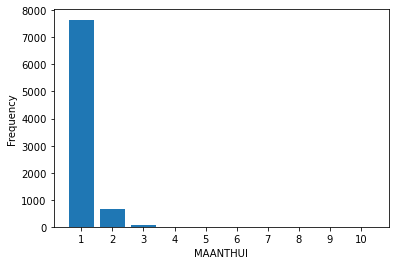

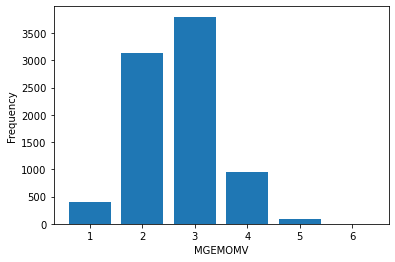

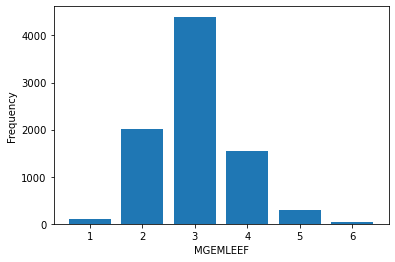

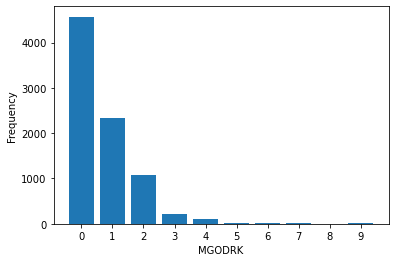

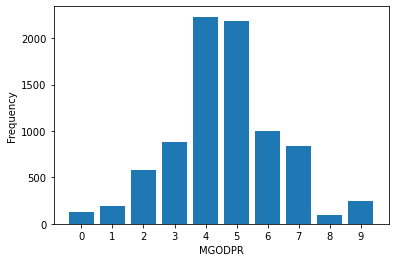

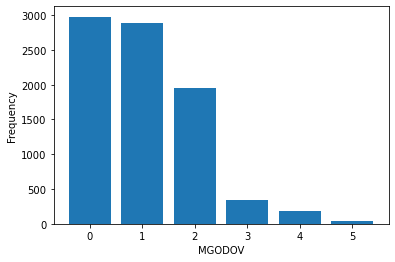

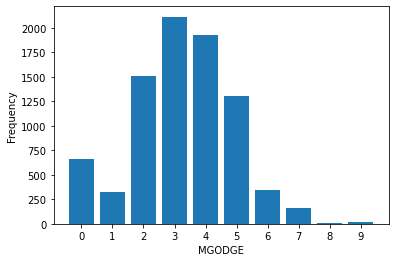

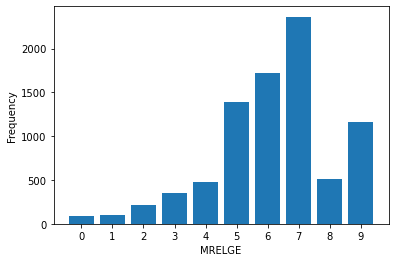

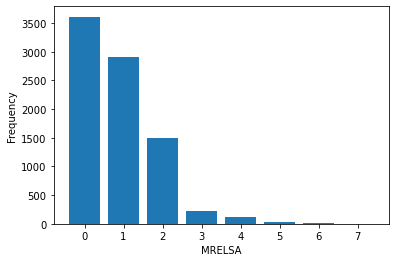

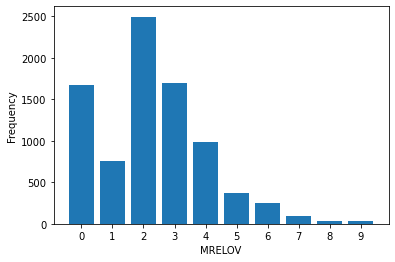

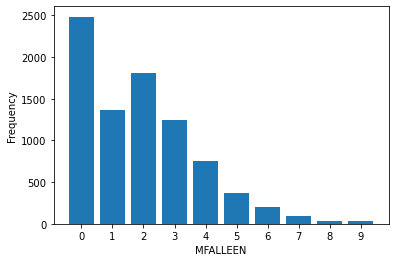

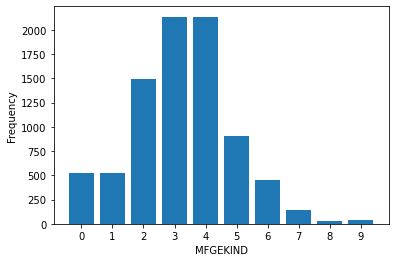

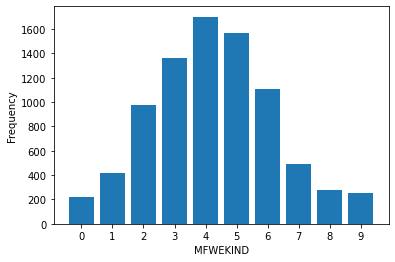

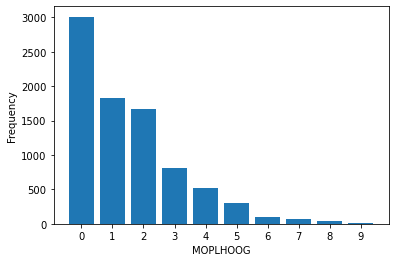

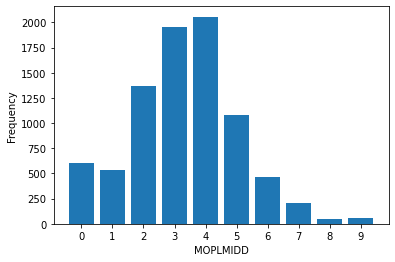

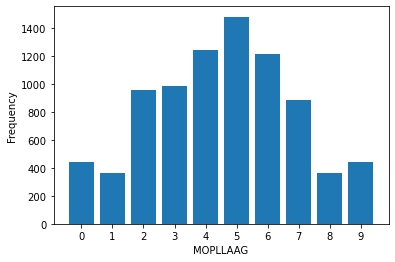

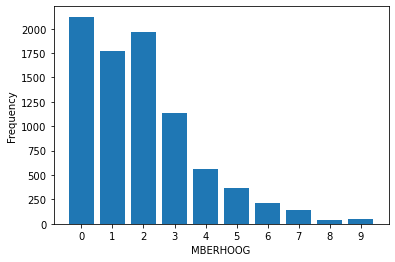

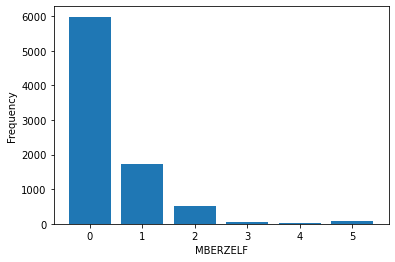

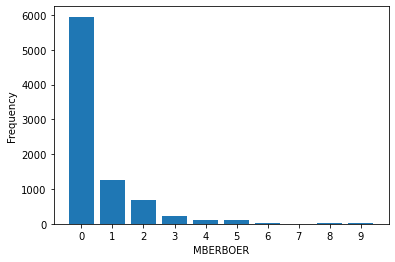

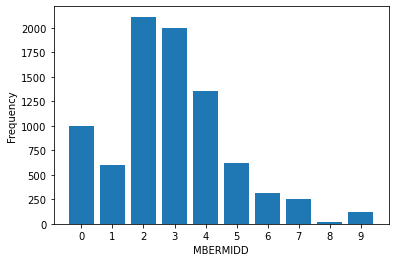

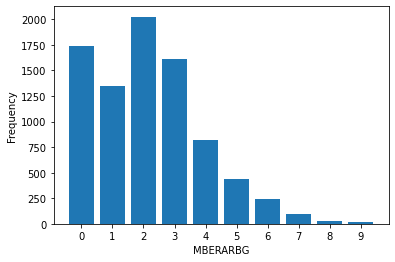

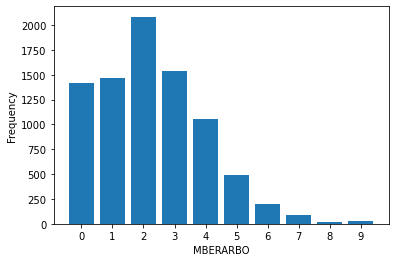

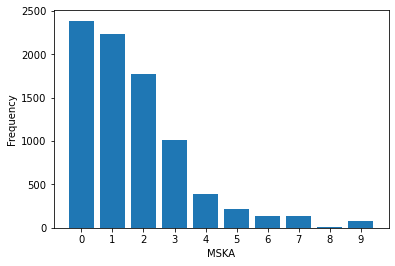

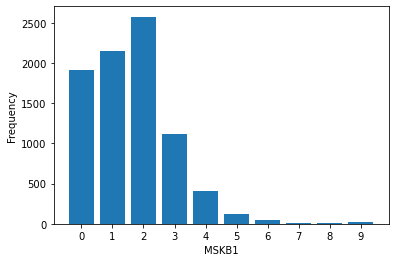

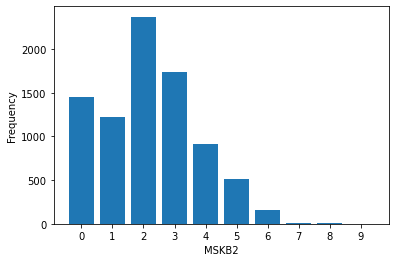

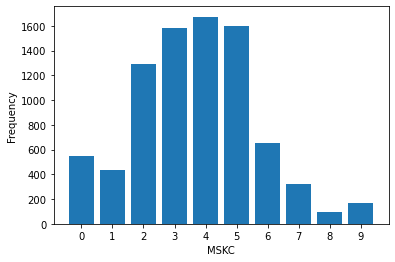

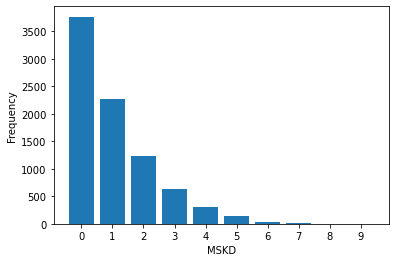

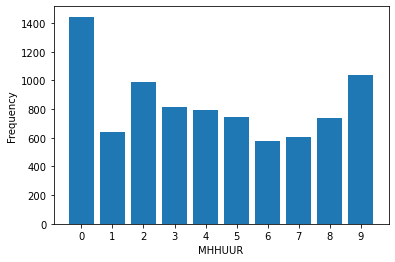

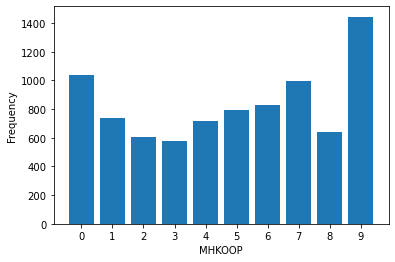

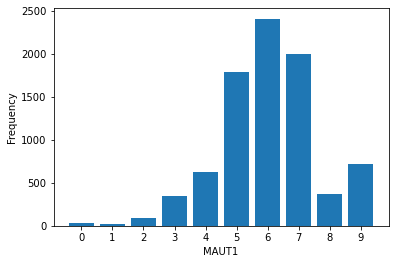

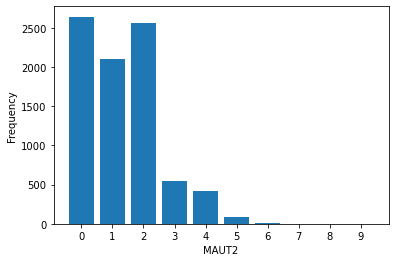

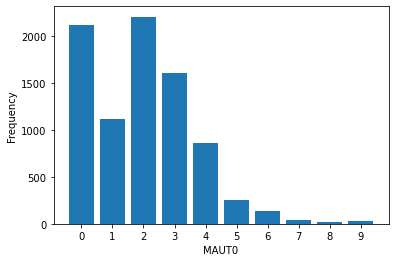

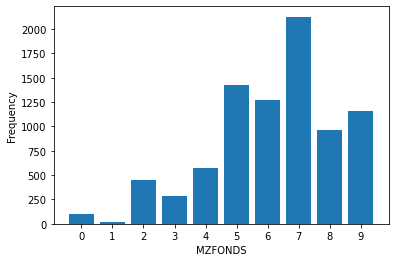

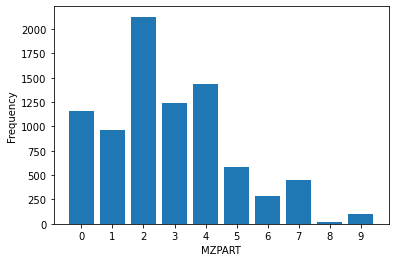

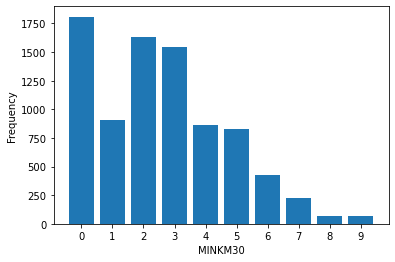

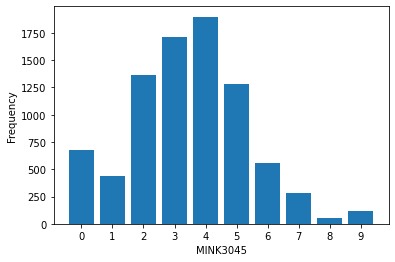

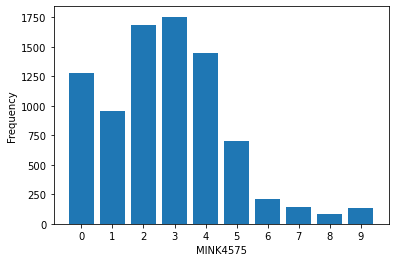

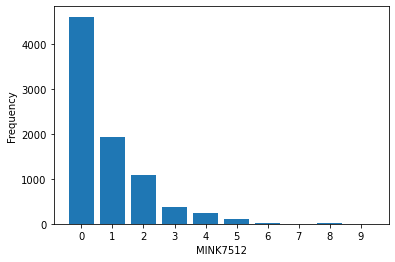

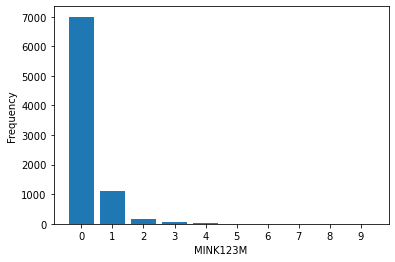

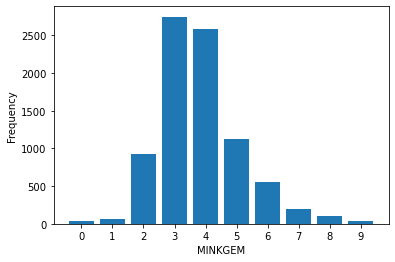

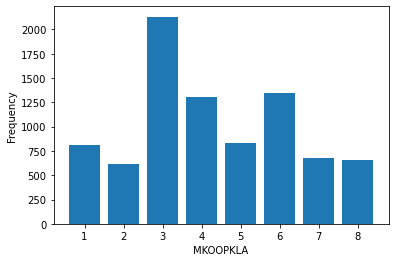

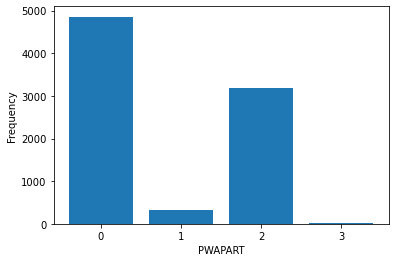

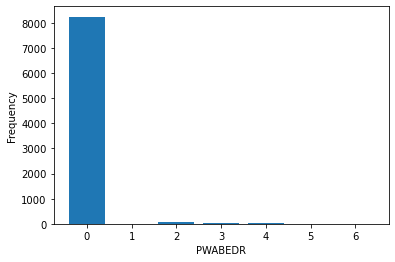

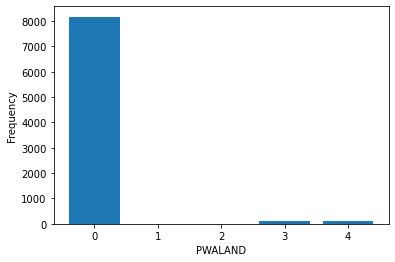

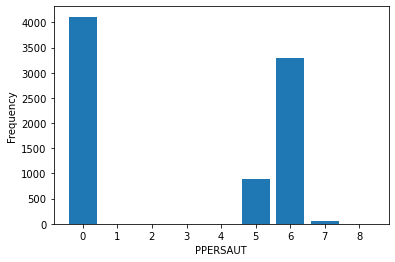

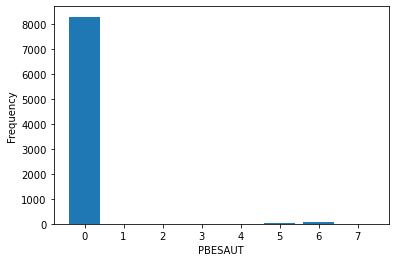

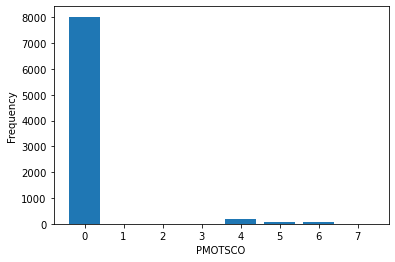

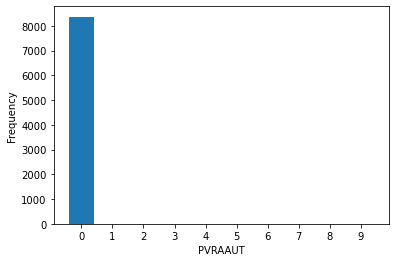

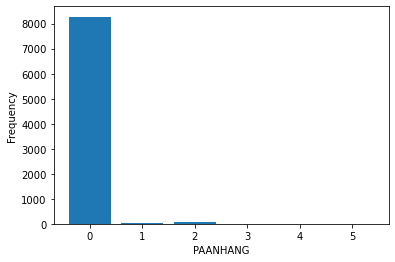

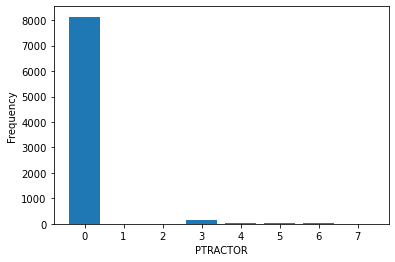

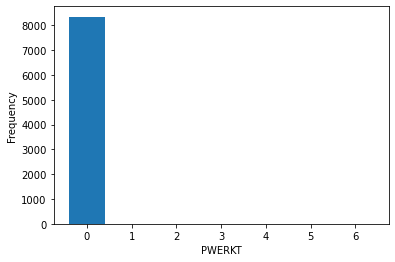

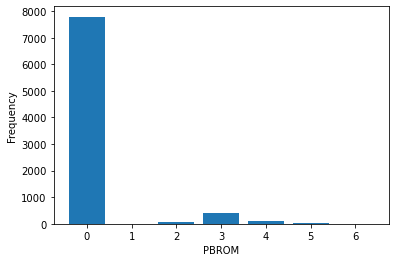

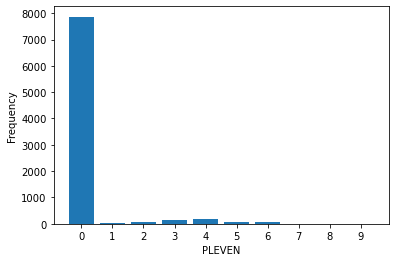

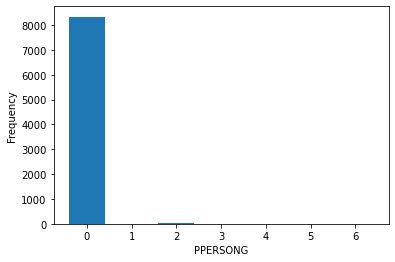

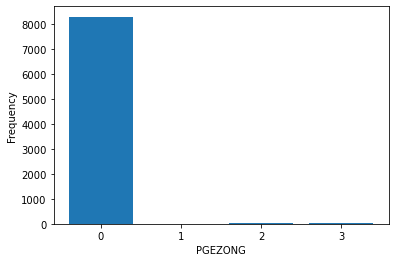

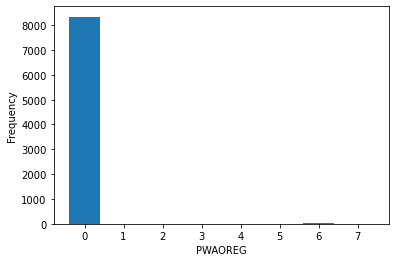

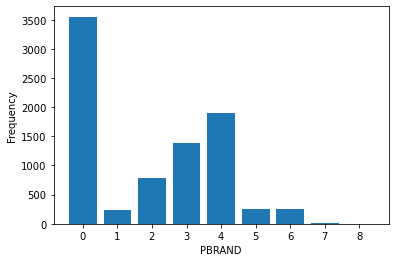

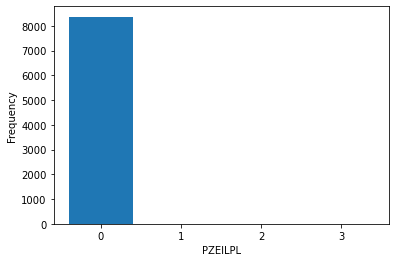

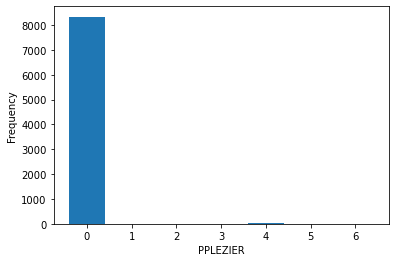

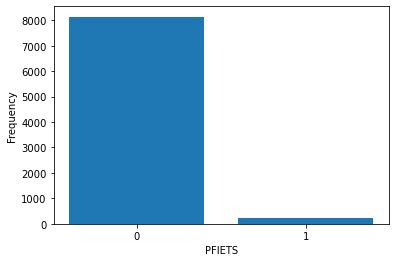

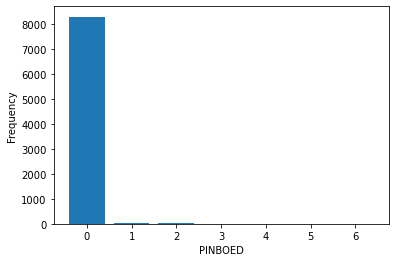

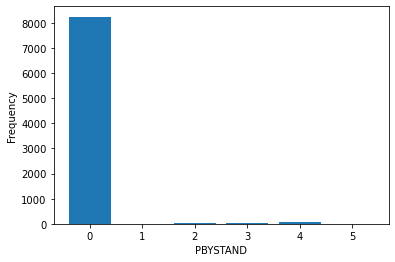

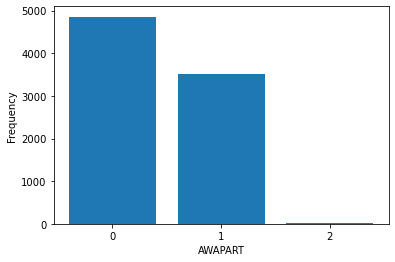

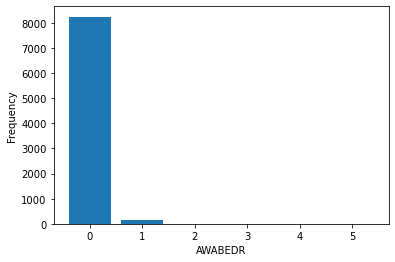

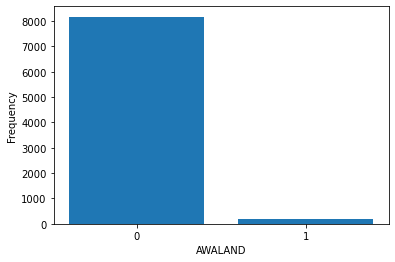

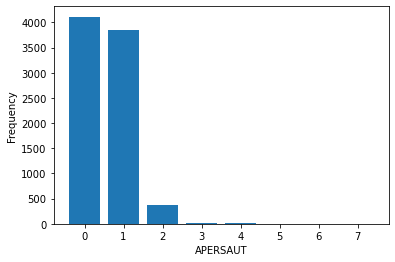

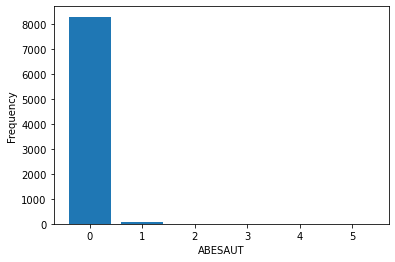

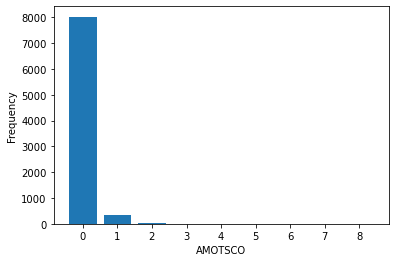

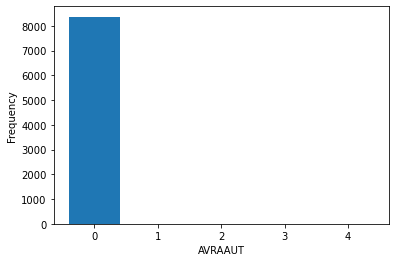

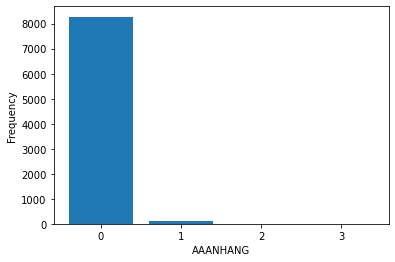

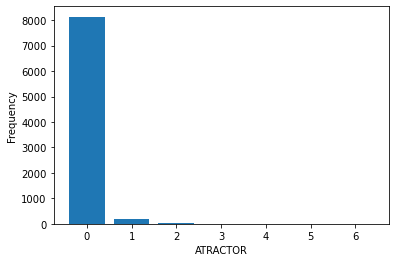

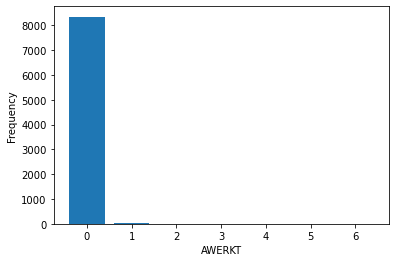

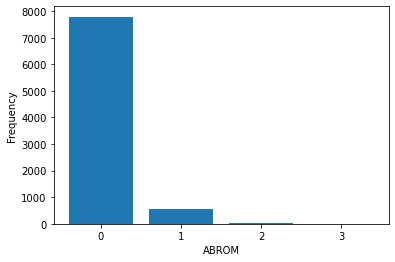

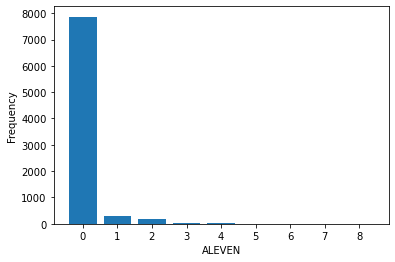

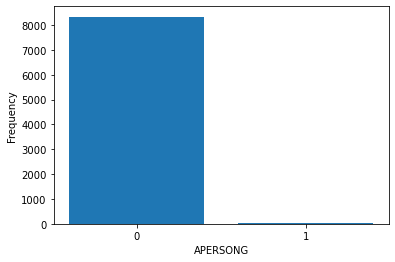

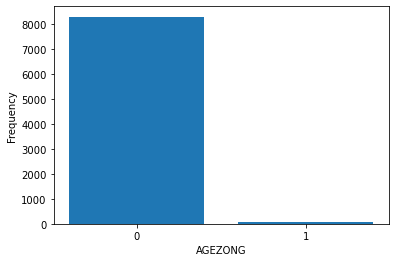

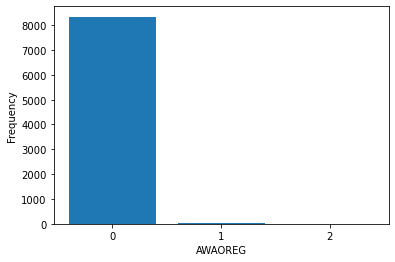

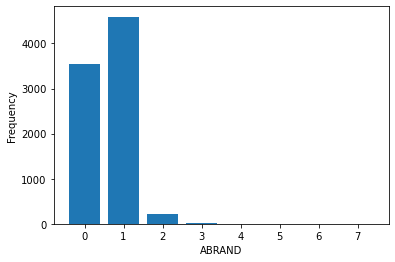

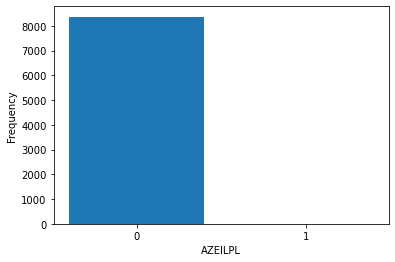

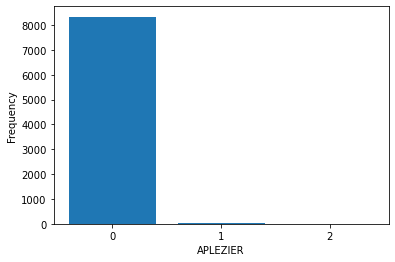

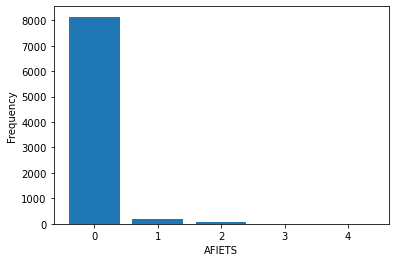

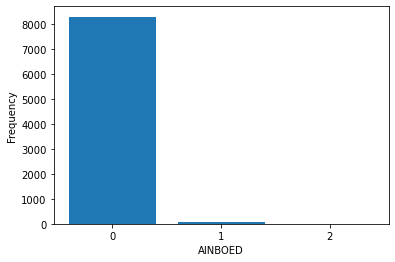

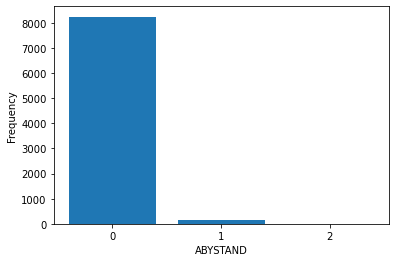

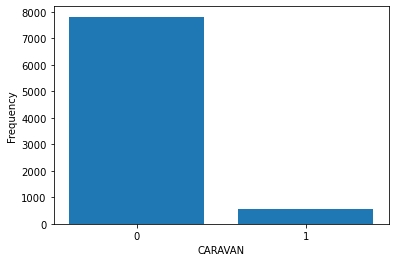

In [23]:
for col in ordinal:
    get_distribution(col)

One thing that is clear is that many variables have skewed distributions, with a small number of very high or very low values. So, we will group together rare values at the upper and lower tails of each distribution, which we view as outliers. At this stage, we want to be careful not to loose too much information--especially since there are so few Caravan-insurance owners in our data set, so we will be quite conservative about declaring a variable an outlier.

More specifically, for each ordinal variable, we find the minimum level such that at least 85 observations are contained in that level and below, and assign all smaller values of the variable with that minimum level. Below, we define functions which will carry out this process.





In [24]:
def trim_low(col_name, df, cutoff):
    # Function that groups together lowest values of a categorical variable.
    # Finds level `min_level` of an ordinal categorical variable such that 
    # at least `cutoff` many values are at or below that level.
    # Returns a series containing the original categorical variable
    # but with every value less than `min_level` replaced by `min_level`.
    
    counts = pd.DataFrame(df[col_name].value_counts().reset_index())
    counts.columns = ['level', col_name]
    counts = counts.sort_values('level', ascending=True)
    counts['cumulative'] = np.cumsum(counts[col_name])
    # More than `cutoff` observations are less than or equal to min_level
    min_level = min(counts.loc[counts['cumulative'] >= cutoff, 'level'])
    
    # All values of the variable less than min_level are replaced with min_level
    small_cats = [level for level in counts.level if level < min_level]
    fixed_col = df[col_name]
    if len(small_cats) > 0:
        fixed_col = fixed_col.replace(small_cats, min_level)
    return(fixed_col)

# Function that groups together highest observations

def trim_high(col_name, df, cutoff):
    # Function that groups together highest values of a categorical variable.
    # Finds level `max_level` of an ordinal categorical variable such that 
    # at least `cutoff` many values are at or above that level.
    # Returns a series containing the original categorical variable
    # but with every value greater than `max_level` replaced by `max_level`.
    
    counts = pd.DataFrame(df[col_name].value_counts().reset_index())
    counts.columns = ['level', col_name]
    counts = counts.sort_values('level', ascending=False)
    counts['cumulative'] = np.cumsum(counts[col_name])
    max_level =  max(counts.loc[counts['cumulative'] >= cutoff, 'level'])
    
    small_cats = [level for level in counts.level if level > max_level]
    fixed_col = df[col_name]
    if len(small_cats) > 0:
        fixed_col = fixed_col.replace(small_cats, max_level)
    return(fixed_col)

Next, we trim the highest and lowest observations as needed from each ordinal variables.

In [25]:
# Ensure our highest and lowest levels of each cateogrical variable have at least 85 observations
cutoff = 85

for col in ordinal:
    df[col] = trim_low(col, df, cutoff)
    df[col] = trim_high(col, df, cutoff)

Having trimmed "outliers," we now find that some ordinal variables have only one unique value! These variables must previously have had only one value with more than 85 features--that is, they must have been extremely low-variance to begin with. We drop these features now.

In [26]:
# Drop features which have only one value after trimming outliers
for col in ordinal:
    if len(df[col].unique()) == 1:
        df = df.drop(col, axis=1)

# Check how many rows and columns remain
df.shape

(8379, 70)

We now take a look at the distributions of our ordinal variables, to see how they have changed. We see that there are fewer very rare values, although some do remain.

In [27]:
ordinal = [col for col in df.columns if col not in nominal]

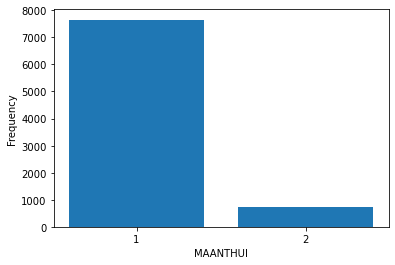

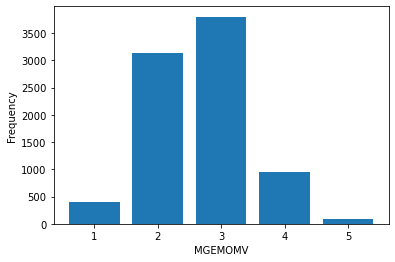

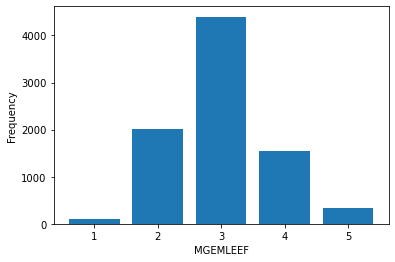

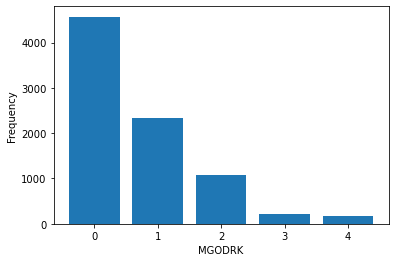

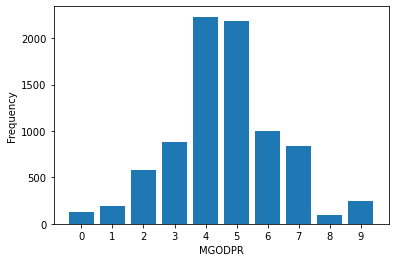

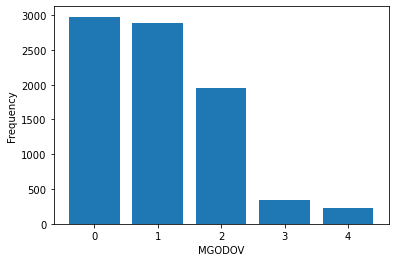

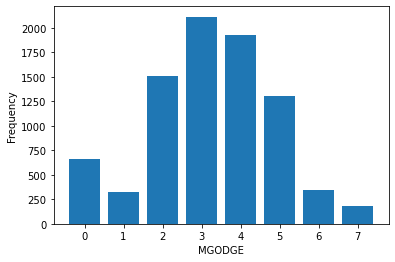

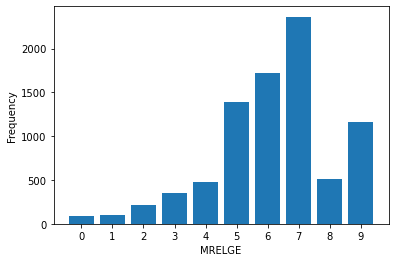

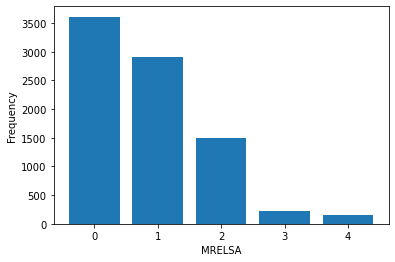

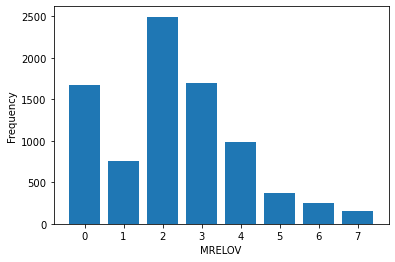

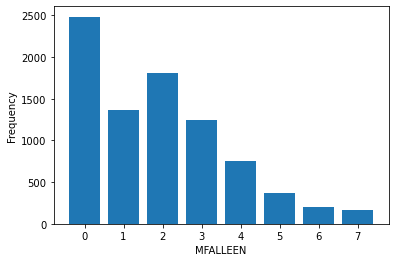

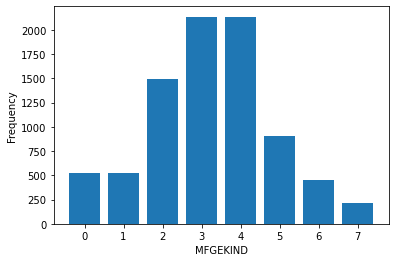

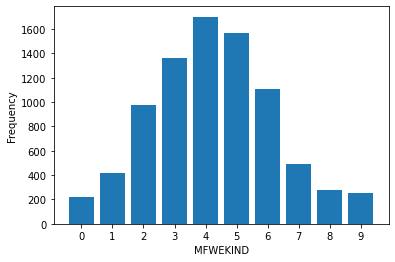

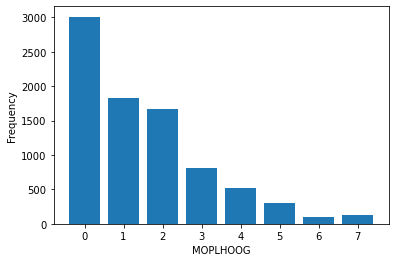

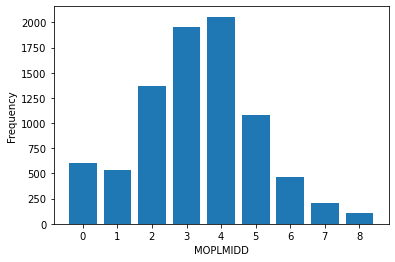

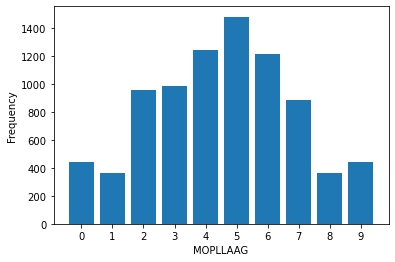

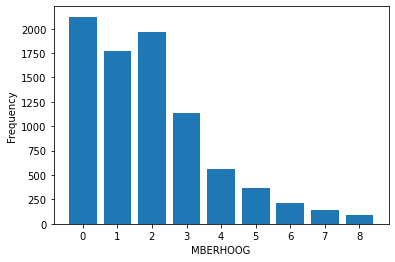

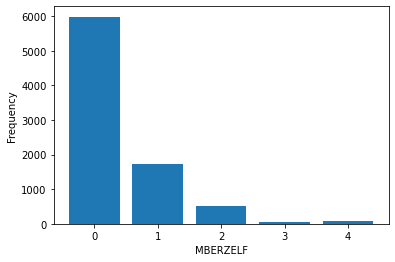

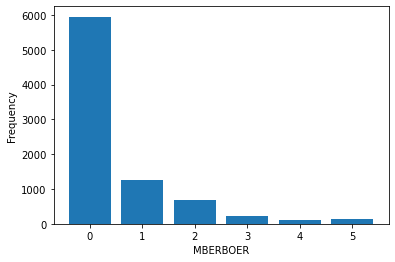

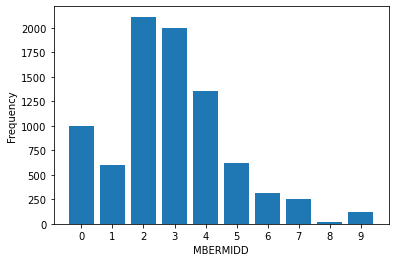

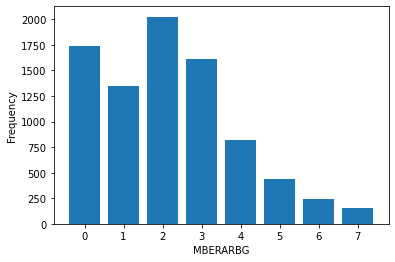

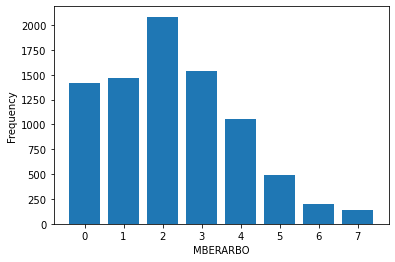

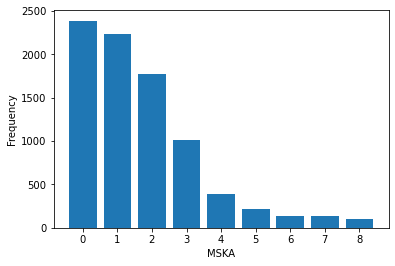

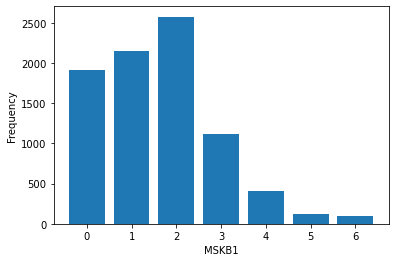

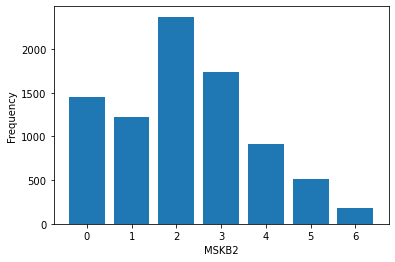

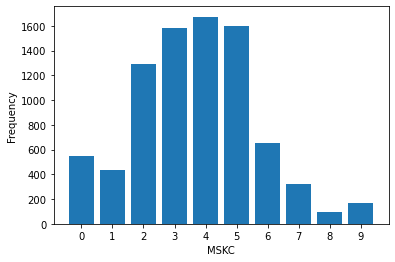

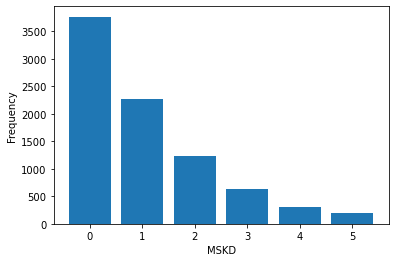

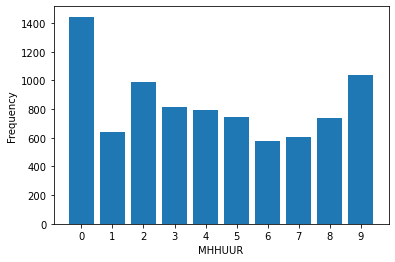

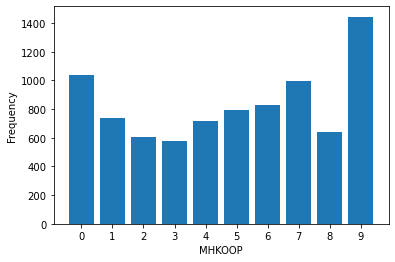

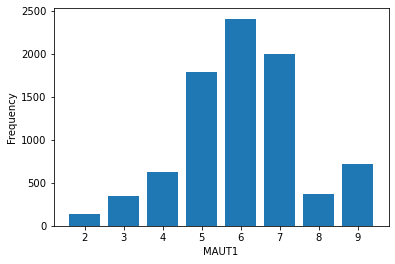

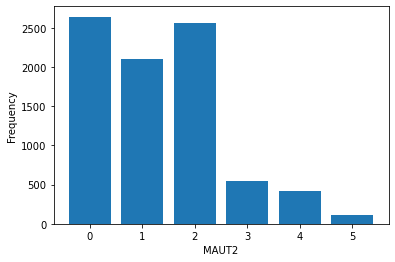

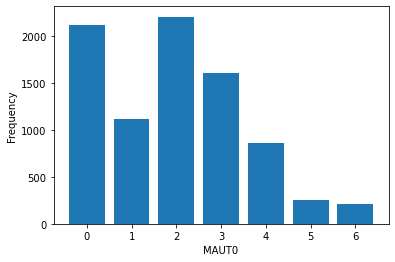

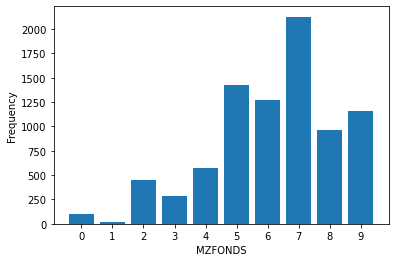

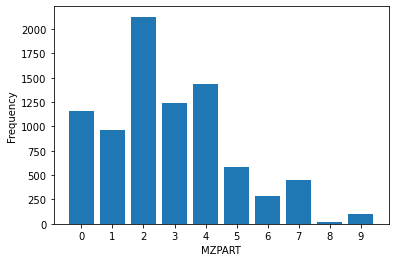

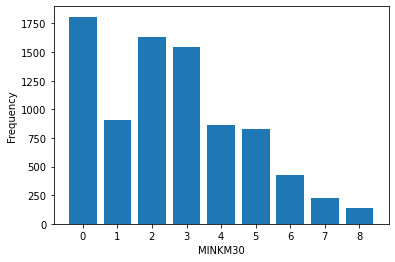

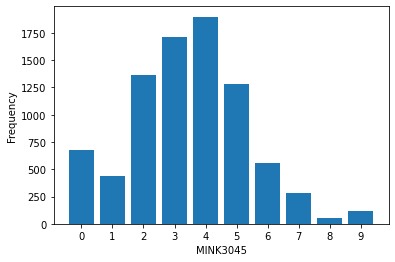

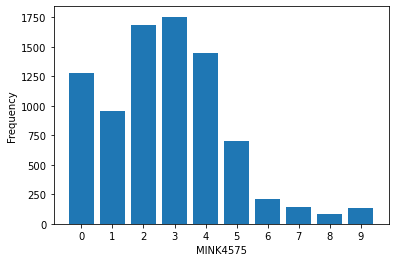

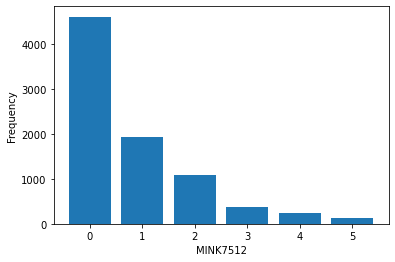

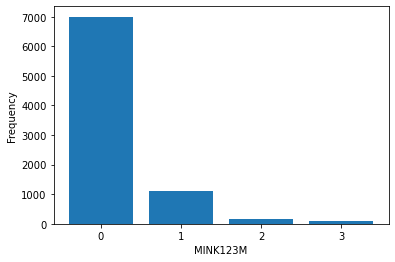

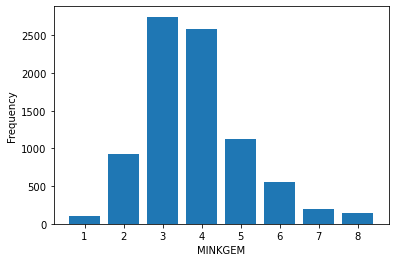

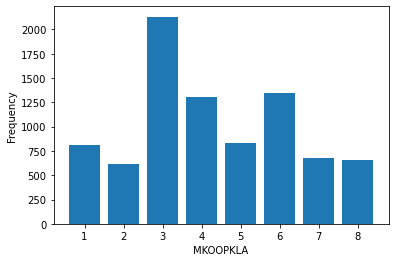

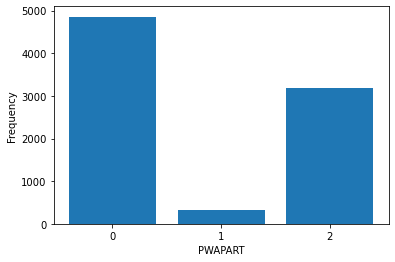

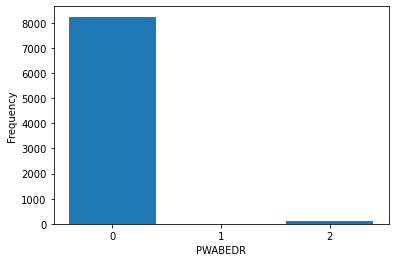

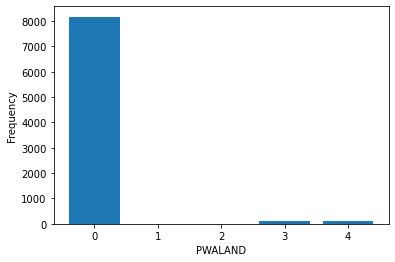

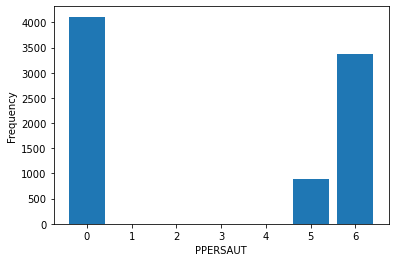

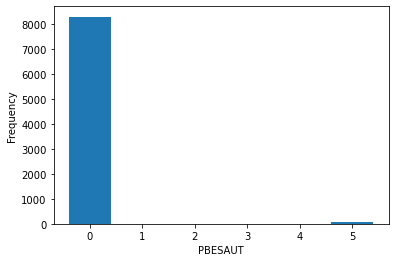

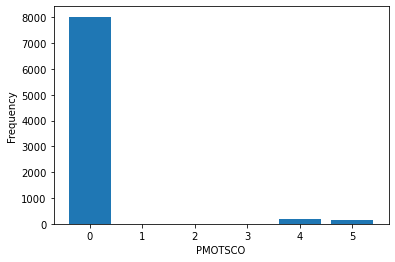

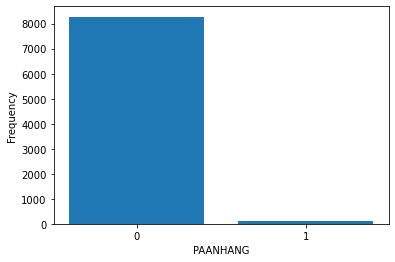

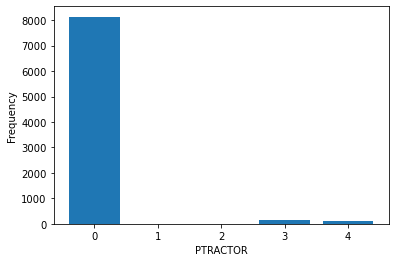

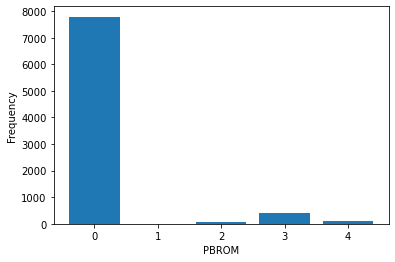

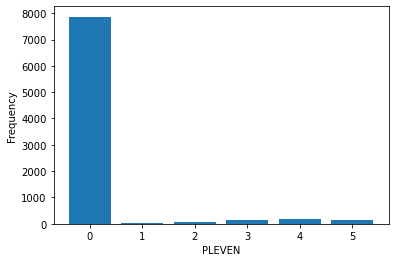

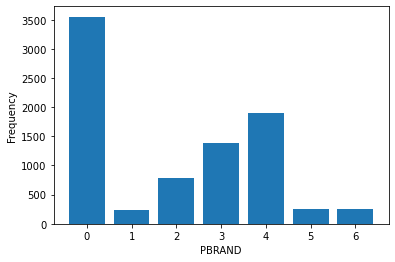

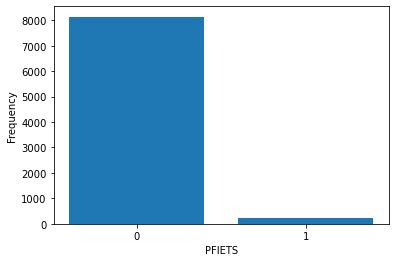

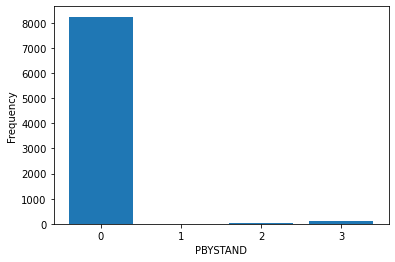

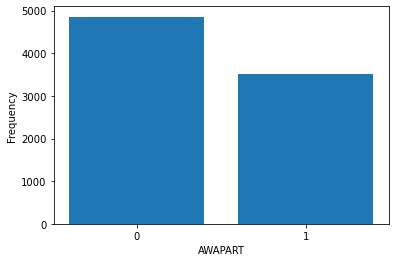

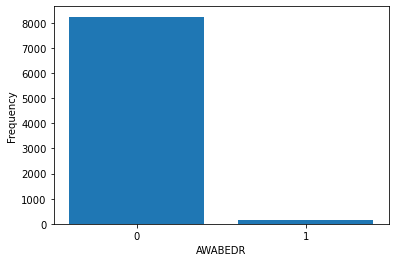

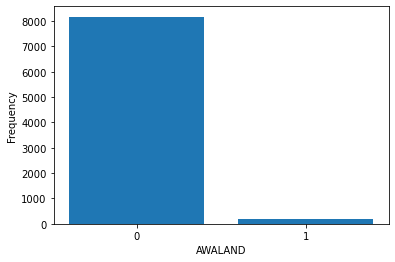

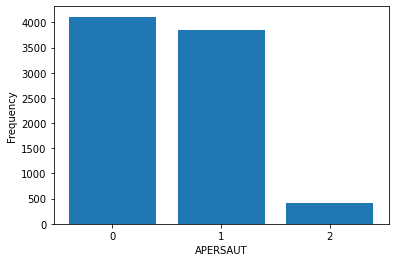

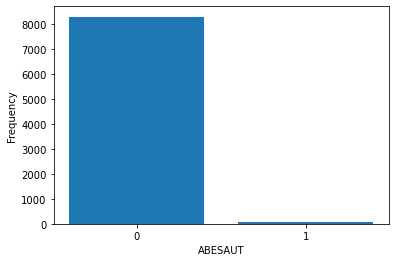

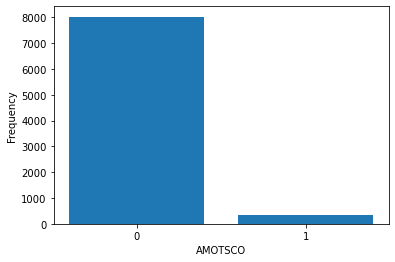

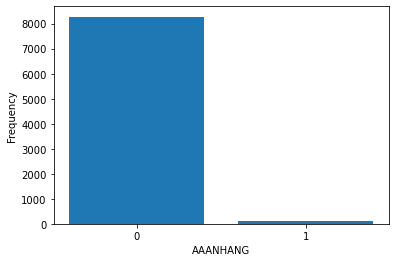

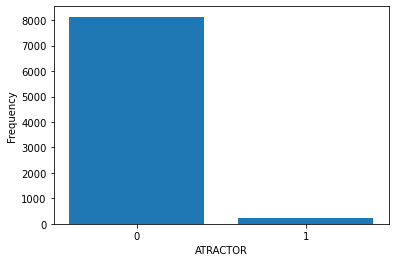

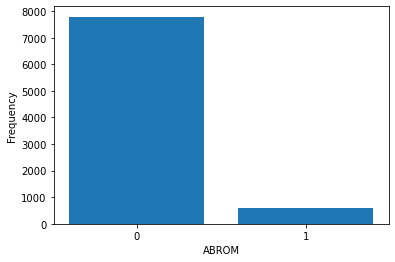

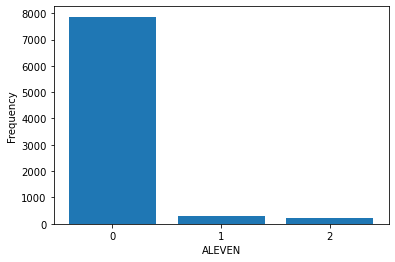

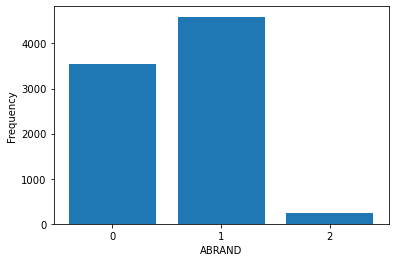

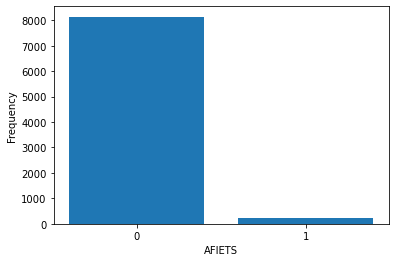

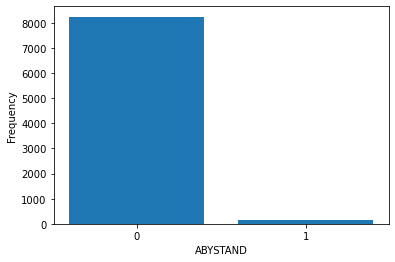

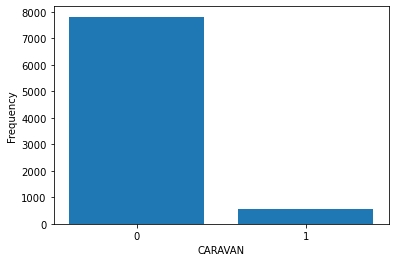

In [28]:
for col in ordinal:
    get_distribution(col)

## Exploratory Data Analysis

### Correlations between ordinal variables

Since most of our features are ordinal categorical variables, we will use Spearman's rank to compute correlations between them, and eliminate highly correlated features.

In [29]:
from scipy.stats import spearmanr

#### Correlations between features and target

First, we create a data frame to record the correlation of each ordinal predictor with the target 'CARAVAN'.

In [30]:
ordinal_features = ordinal
ordinal_features.remove('CARAVAN')

In [31]:
# Create data from containing spearman correlation and pvalue
target_cor_results = [spearmanr(df[col], df['CARAVAN']) for col in ordinal]
target_cor_tuples = [(col, target_cor_results[idx][0], 
                      target_cor_results[idx][1]) for idx, col in enumerate(ordinal)]
target_cor_df = pd.DataFrame(columns = ['variable', 'cor', 'pval'], data = target_cor_tuples)

# Add a column for the absolute value of correlation, 
# which indicates strength of relationship.
# Sort our data frame by this column.
target_cor_df['abs_cor'] = target_cor_df.cor.abs()
target_cor_df = target_cor_df.sort_values('abs_cor', ascending=False)
target_cor_df.head()

,variable,cor,pval,abs_cor
44,PPERSAUT,0.160238,2.614739e-49,0.160238
57,APERSAUT,0.139466,1.156467e-37,0.139466
40,MKOOPKLA,0.097025,5.531257e-19,0.097025
39,MINKGEM,0.094542,4.238848e-18,0.094542
51,PBRAND,0.090673,9.112320e-17,0.090673


In [32]:
# Save sorted list of features
sorted_vars = target_cor_df.variable
sorted_vars[:5]

44    PPERSAUT
57    APERSAUT
40    MKOOPKLA
39     MINKGEM
51      PBRAND
Name: variable, dtype: object

#### Correlations between features

We create a matrix of correlations between features, and visualize the correlations witg a heatmap.

In [33]:
# Create matrix of correlations
features_cor_matrix = [[spearmanr(df[col1], df[col2])[0] for col2 in sorted_vars] for col1 in sorted_vars]

In [34]:
# For convenience, transform matrix to a data frame

features_cor_df = pd.DataFrame(columns=sorted_vars, data=features_cor_matrix, index=sorted_vars)
features_cor_df.head()

variable,PPERSAUT,APERSAUT,MKOOPKLA,MINKGEM,PBRAND,PWAPART,MINKM30,MOPLLAAG,AWAPART,MOPLHOOG,MINK4575,MAUT0,MHHUUR,MHKOOP,MAUT1,MRELGE,MBERBOER,MRELOV,MSKA,MSKD,ABRAND,MZFONDS,MFALLEEN,MBERARBO,MZPART,MBERHOOG,MSKC,PBYSTAND,ABYSTAND,MINK7512,MGEMOMV,MFWEKIND,MBERARBG,PBROM,ABROM,MGODGE,PWALAND,AWALAND,MGODPR,ALEVEN,MOPLMIDD,MBERMIDD,PLEVEN,MBERZELF,MRELSA,PTRACTOR,ATRACTOR,MSKB1,MGODRK,ABESAUT,PBESAUT,AFIETS,PFIETS,AAANHANG,PAANHANG,MAANTHUI,MAUT2,MGEMLEEF,AWABEDR,PWABEDR,MSKB2,MGODOV,MFGEKIND,MINK3045,PMOTSCO,AMOTSCO,MINK123M
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PPERSAUT,1.000000,0.947515,0.030854,0.033495,0.126627,0.169979,-0.041447,-0.010595,0.160777,0.009209,0.036395,-0.055185,-0.021746,0.021511,0.038769,0.034241,-0.021279,-0.031251,0.015648,-0.031666,0.065939,-0.037665,-0.036523,-0.014326,0.036832,0.010601,-0.003962,0.094213,0.094380,-0.001527,0.025763,0.031055,-0.013620,-0.161120,-0.160340,-0.014736,0.075837,0.075811,0.023616,0.073585,0.005208,-0.013967,0.073351,-0.012354,-0.004434,0.086500,0.086066,-0.010712,-0.007654,0.012033,0.012033,-0.029586,-0.029586,0.054767,0.054767,-0.001297,0.020945,-0.010731,-0.006793,-0.006667,-0.004904,-0.018939,-0.001401,0.019120,0.072441,0.072377,-0.019577
APERSAUT,0.947515,1.000000,0.029623,0.020230,0.106759,0.161801,-0.027945,-0.000841,0.151407,-0.002405,0.028162,-0.053334,-0.011161,0.011021,0.038335,0.032155,-0.019034,-0.030407,0.007044,-0.023738,0.046020,-0.030122,-0.033352,-0.009352,0.029315,-0.000064,0.003420,0.103553,0.103794,-0.008003,0.022342,0.033071,-0.006589,-0.167112,-0.166327,-0.011833,0.077822,0.077788,0.025228,0.066917,0.004664,-0.012877,0.066364,-0.016460,-0.002064,0.089738,0.089421,-0.010745,-0.017441,0.014144,0.014144,-0.036250,-0.036250,0.056482,0.056482,-0.005407,0.020256,-0.014399,-0.007627,-0.007499,-0.007215,-0.017274,-0.007102,0.020632,0.077927,0.077757,-0.027191
MKOOPKLA,0.030854,0.029623,1.000000,0.469537,0.086273,-0.005921,-0.399626,-0.448828,-0.013225,0.371468,0.381510,-0.398578,-0.416649,0.416403,0.267735,0.323521,-0.119202,-0.327334,0.345394,-0.323174,0.004837,-0.403376,-0.290007,-0.341236,0.403026,0.350269,-0.338773,0.059047,0.058974,0.246801,0.303384,0.256692,-0.248096,-0.013655,-0.015041,-0.043832,-0.010015,-0.010143,0.029550,0.069967,0.238414,0.143251,0.071213,0.083706,-0.050975,-0.017780,-0.017930,0.194479,0.130791,0.003706,0.003706,0.028400,0.028400,0.004518,0.004518,0.016760,0.142986,-0.138340,0.003290,0.003299,0.054764,-0.073033,-0.014857,-0.136117,0.019015,0.018928,0.162382
MINKGEM,0.033495,0.020230,0.469537,1.000000,0.069476,0.001270,-0.694648,-0.468075,-0.004310,0.412715,0.623210,-0.412590,-0.455574,0.454850,0.247627,0.345567,-0.054622,-0.364521,0.425857,-0.341812,0.010251,-0.462462,-0.374674,-0.320357,0.462712,0.403073,-0.365642,0.037957,0.038014,0.556713,0.296460,0.207309,-0.277923,-0.024245,-0.024615,-0.085720,0.013156,0.013136,0.034215,0.038571,0.242257,0.123436,0.039567,0.163854,-0.045724,-0.012142,-0.012191,0.195585,0.191746,-0.009252,-0.009252,0.025897,0.025897,0.005642,0.005642,0.001592,0.169985,-0.080033,-0.001293,-0.001283,0.119163,-0.043830,0.148934,-0.203159,0.008683,0.008415,0.307797
PBRAND,0.126627,0.106759,0.086273,0.069476,1.000000,0.460795,-0.079062,-0.002310,0.459585,0.018170,0.050983,-0.074410,-0.177970,0.177582,0.012061,0.044239,0.096976,-0.041666,0.059398,-0.039372,0.899566,-0.050075,-0.055557,-0.053088,0.050204,0.047671,-0.045429,0.057440,0.057214,0.023077,0.067970,0.046463,-0.024001,-0.179617,-0.179035,-0.086677,0.210201,0.210026,0.108201,0.120052,-0.014525,-0.037541,0.119345,0.049809,-0.014514,0.183828,0.183370,0.003120,-0.024422,0.019912,0.019912,-0.045680,-0.045680,0.036569,0.036569,0.002051,0.076067,0.015877,0.074505,0.074624,0.028269,-0.024992,0.011995,0.018255,0.000340,0.000533,0.041734


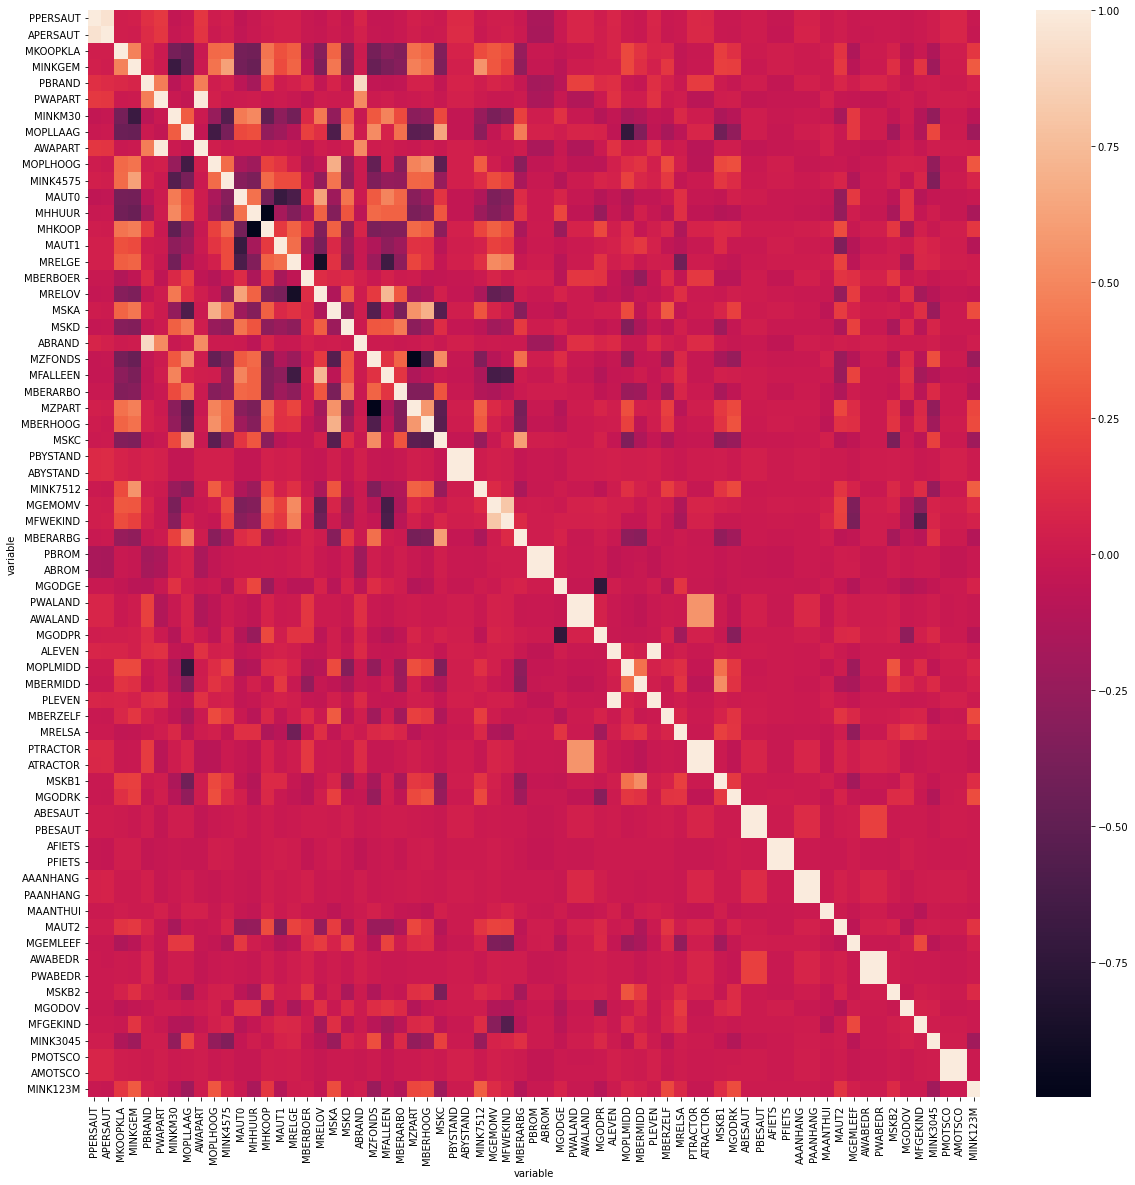

In [35]:
# Visualize the correlations with a heatmap

import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(features_cor_df)
plt.show()

We notice there are some very strong correlations. It is interesting that most correlations seem to occur in the upper-left quadrant, corresponding to features with a relatively strong relationship to our target.

#### Removing highly correlated features

We want to drop highly correlated features. We start with a list of variables, in ascending order by absolute correlation with the target variable. We then systematically drop each variable which has an absolute correlation of 0.75 or higher with any variable later on the list. The result is a list of variables, any two of which have a correlation less than 0.75.

In [36]:
# Define a function to identify highly correlated features.

def find_correlated(correlations):
    # For the function to perform as expected,
    # the data frame of correlations should have rows and columns
    # arrange in order of decreasing absolute correlation with the target.
    # (That is: decreasing importance.)
    # Iterate over the list of variables in reverse order,
    # and create a list features which are highly correlated 
    # with another feature that appears earlier in the original feature list.
    correlated = []
    var_list = correlations.columns.to_list()
    num_vars = len(var_list)
    for idx1 in range(num_vars-1, 0, -1):
        cors = [np.abs(features_cor_df.iloc[idx1, idx2]) for idx2 in range(0, idx1)]
        if max(cors) >= 0.75:
            print(var_list[idx1], 'has a max absolute correlation of', round(max(np.abs(cors)), 4))
            correlated.append(var_list[idx1])
    return correlated

In [37]:
correlated_vars = find_correlated(features_cor_df)

AMOTSCO has a max absolute correlation of 0.9998
PWABEDR has a max absolute correlation of 1.0
PAANHANG has a max absolute correlation of 1.0
PFIETS has a max absolute correlation of 1.0
PBESAUT has a max absolute correlation of 1.0
ATRACTOR has a max absolute correlation of 0.9999
PLEVEN has a max absolute correlation of 0.9989
AWALAND has a max absolute correlation of 0.9999
ABROM has a max absolute correlation of 0.9994
MFWEKIND has a max absolute correlation of 0.8079
ABYSTAND has a max absolute correlation of 1.0
MZPART has a max absolute correlation of 0.9993
ABRAND has a max absolute correlation of 0.8996
MRELOV has a max absolute correlation of 0.8865
MHKOOP has a max absolute correlation of 0.9996
AWAPART has a max absolute correlation of 0.9873
APERSAUT has a max absolute correlation of 0.9475


In [38]:
# Drop one from each pair of higly correlated features.
# Our function ensures we will drop the variable
# which has a weaker correlation with the target.
df = df.drop(correlated_vars, axis=1)

In [39]:
df.shape

(8379, 53)

To verify that we were successful in dropping highly-correlated features, we plot a new correlation heatmap with only the features we have decided to keep. The new heat map shows that we no longer have strong correlations between features.

In [40]:
ordinal_keep = [var for var in features_cor_df.columns if var in df.columns]
features_cor_kept = features_cor_df.loc[ordinal_keep, ordinal_keep]
features_cor_kept.head()

variable,PPERSAUT,MKOOPKLA,MINKGEM,PBRAND,PWAPART,MINKM30,MOPLLAAG,MOPLHOOG,MINK4575,MAUT0,MHHUUR,MAUT1,MRELGE,MBERBOER,MSKA,MSKD,MZFONDS,MFALLEEN,MBERARBO,MBERHOOG,MSKC,PBYSTAND,MINK7512,MGEMOMV,MBERARBG,PBROM,MGODGE,PWALAND,MGODPR,ALEVEN,MOPLMIDD,MBERMIDD,MBERZELF,MRELSA,PTRACTOR,MSKB1,MGODRK,ABESAUT,AFIETS,AAANHANG,MAANTHUI,MAUT2,MGEMLEEF,AWABEDR,MSKB2,MGODOV,MFGEKIND,MINK3045,PMOTSCO,MINK123M
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PPERSAUT,1.000000,0.030854,0.033495,0.126627,0.169979,-0.041447,-0.010595,0.009209,0.036395,-0.055185,-0.021746,0.038769,0.034241,-0.021279,0.015648,-0.031666,-0.037665,-0.036523,-0.014326,0.010601,-0.003962,0.094213,-0.001527,0.025763,-0.013620,-0.161120,-0.014736,0.075837,0.023616,0.073585,0.005208,-0.013967,-0.012354,-0.004434,0.086500,-0.010712,-0.007654,0.012033,-0.029586,0.054767,-0.001297,0.020945,-0.010731,-0.006793,-0.004904,-0.018939,-0.001401,0.019120,0.072441,-0.019577
MKOOPKLA,0.030854,1.000000,0.469537,0.086273,-0.005921,-0.399626,-0.448828,0.371468,0.381510,-0.398578,-0.416649,0.267735,0.323521,-0.119202,0.345394,-0.323174,-0.403376,-0.290007,-0.341236,0.350269,-0.338773,0.059047,0.246801,0.303384,-0.248096,-0.013655,-0.043832,-0.010015,0.029550,0.069967,0.238414,0.143251,0.083706,-0.050975,-0.017780,0.194479,0.130791,0.003706,0.028400,0.004518,0.016760,0.142986,-0.138340,0.003290,0.054764,-0.073033,-0.014857,-0.136117,0.019015,0.162382
MINKGEM,0.033495,0.469537,1.000000,0.069476,0.001270,-0.694648,-0.468075,0.412715,0.623210,-0.412590,-0.455574,0.247627,0.345567,-0.054622,0.425857,-0.341812,-0.462462,-0.374674,-0.320357,0.403073,-0.365642,0.037957,0.556713,0.296460,-0.277923,-0.024245,-0.085720,0.013156,0.034215,0.038571,0.242257,0.123436,0.163854,-0.045724,-0.012142,0.195585,0.191746,-0.009252,0.025897,0.005642,0.001592,0.169985,-0.080033,-0.001293,0.119163,-0.043830,0.148934,-0.203159,0.008683,0.307797
PBRAND,0.126627,0.086273,0.069476,1.000000,0.460795,-0.079062,-0.002310,0.018170,0.050983,-0.074410,-0.177970,0.012061,0.044239,0.096976,0.059398,-0.039372,-0.050075,-0.055557,-0.053088,0.047671,-0.045429,0.057440,0.023077,0.067970,-0.024001,-0.179617,-0.086677,0.210201,0.108201,0.120052,-0.014525,-0.037541,0.049809,-0.014514,0.183828,0.003120,-0.024422,0.019912,-0.045680,0.036569,0.002051,0.076067,0.015877,0.074505,0.028269,-0.024992,0.011995,0.018255,0.000340,0.041734
PWAPART,0.169979,-0.005921,0.001270,0.460795,1.000000,-0.008754,-0.041253,0.035415,-0.001535,0.004797,0.009014,0.002232,-0.022180,-0.057202,0.001532,0.007370,0.005355,0.022484,-0.009553,0.014595,-0.019121,0.039758,0.006177,-0.017484,0.004089,-0.148388,-0.016832,-0.124772,-0.001630,0.140786,0.022515,0.021549,0.002183,0.016470,-0.085099,0.021539,0.026480,-0.045744,-0.024328,-0.024057,0.044496,-0.023578,-0.032902,-0.039954,-0.006125,0.014028,-0.020051,0.020049,0.025881,0.011298


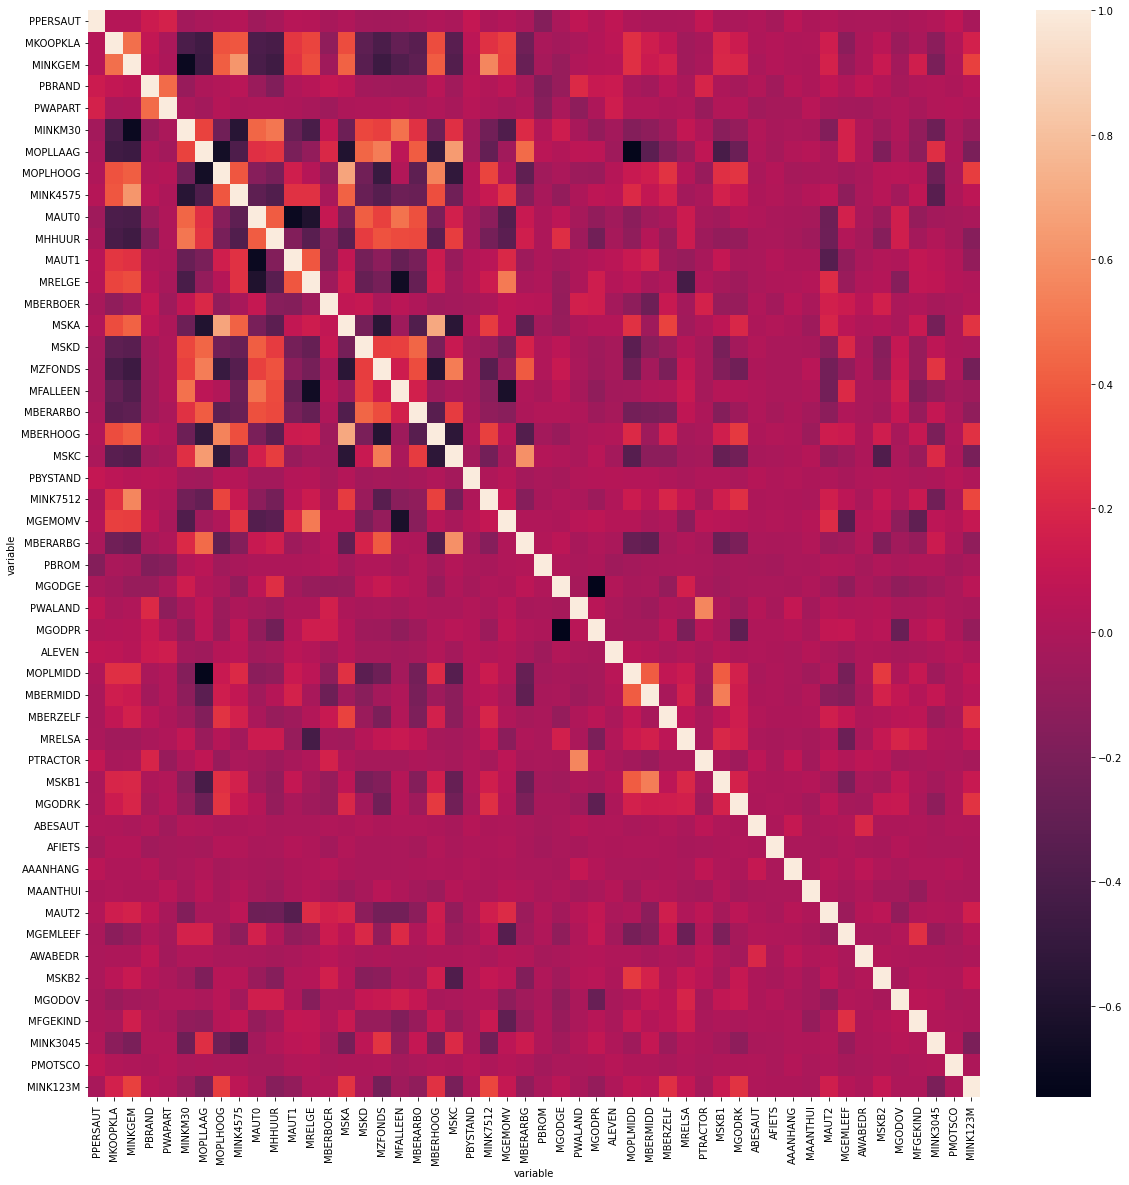

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(features_cor_kept)
plt.show()

## Distributions and caravan insurance ownership rates by category for ordinal variables

We now visualize each of our nominal variables. For each variable, we plot bar graphs showing both the frequency of each level, and the proportion of Caravan insurance ownership for each level.

In [42]:
def visualize(col_name):
    
    # Number of observations for each level of categorical variable
    counts = df[col_name].value_counts()
    
    # Proportion of observations with a caravan insurance policy for each level
    props = df.groupby(col_name).CARAVAN.mean()

    # Set up figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(20)

    # Plot frequency distribution as a bar chart
    ax1.bar(counts.index, counts)
    ax1.set_xticks(range(min(counts.index), max(counts.index)+1))
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Frequency')

    # Plot rates of caravan insurance ownership for each level as a bar chart
    ax2.bar(props.index, props)
    ax2.set_xticks(range(min(counts.index), max(counts.index)+1))
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('Caravan Ownership Rate')

    fig.suptitle(col_name+': Frequency distribution, Caravan insurance by category')
    plt.show()

In addition to the graphs, we also display the correlation between each variable and the target, as well as the p-value for that correlation. (A p-value under 0.05 is statistically significant.)

In [43]:
# Subset data frame of correlations between features and target
# on features that we are keeping at this stage.
# Index by variable names for each access.

target_cor_keep = target_cor_df.loc[target_cor_df['variable'].isin(df.columns)]
target_cor_keep = target_cor_keep.set_index('variable', drop=True)

In [44]:
# Given a variable name and property formated data frame
# of correlations, report correlation with target
# and p-value in a nice format.

def report_result(var, df_of_cors):
    cor = round(df_of_cors.loc[var, 'cor'], 4)
    pval = round(df_of_cors.loc[var, 'pval'], 4)
    print('Variable', var, 
          'has a correlation of {} with the target, p = {}'.format(cor, pval))

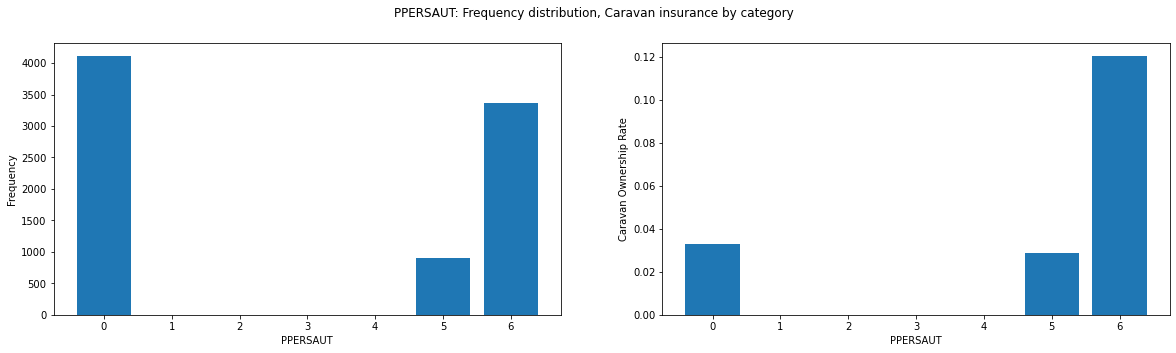

Variable PPERSAUT has a correlation of 0.1602 with the target, p = 0.0

 



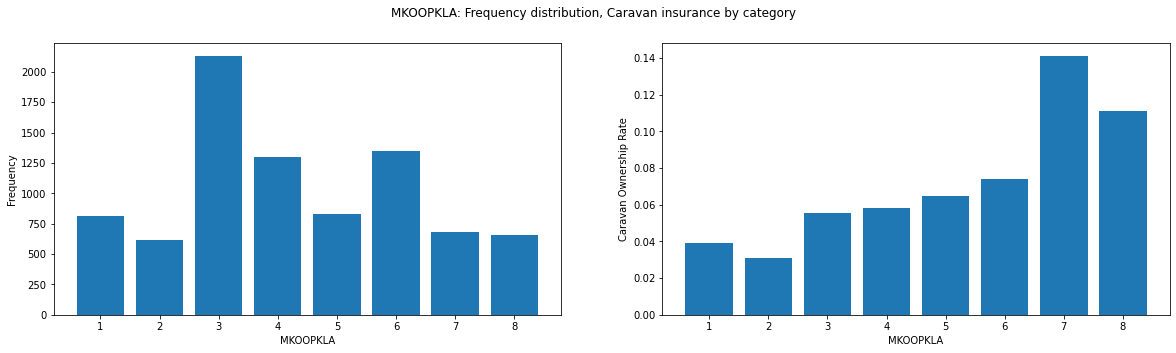

Variable MKOOPKLA has a correlation of 0.097 with the target, p = 0.0

 



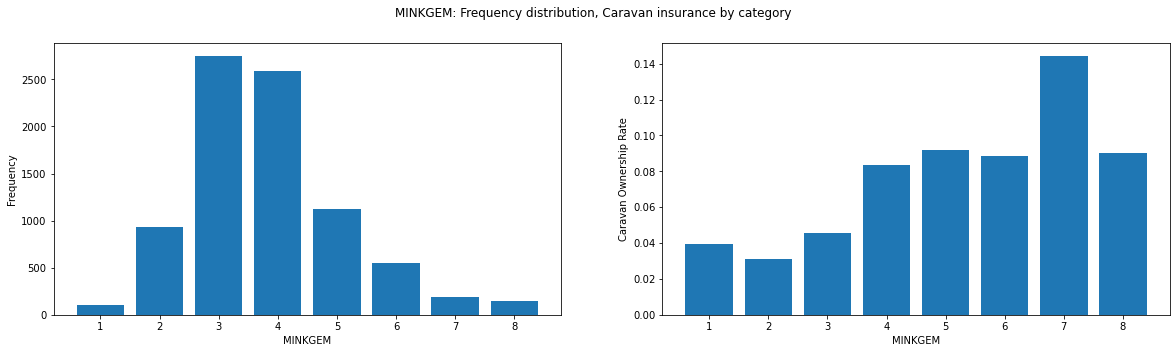

Variable MINKGEM has a correlation of 0.0945 with the target, p = 0.0

 



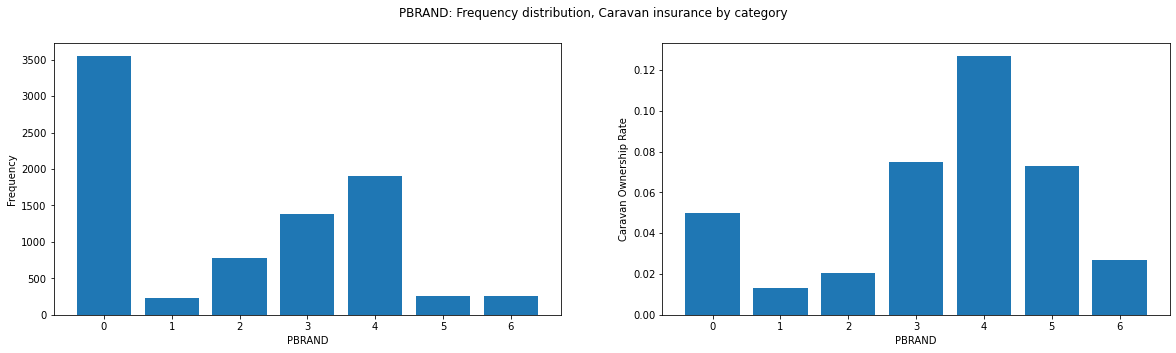

Variable PBRAND has a correlation of 0.0907 with the target, p = 0.0

 



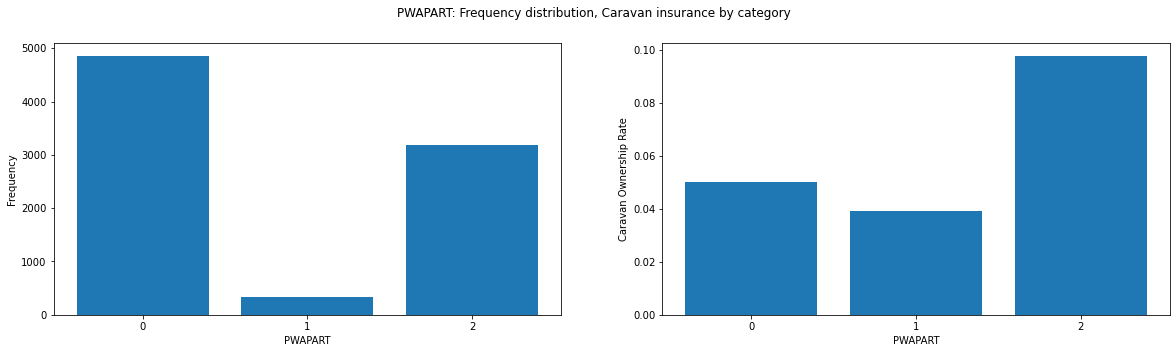

Variable PWAPART has a correlation of 0.0888 with the target, p = 0.0

 



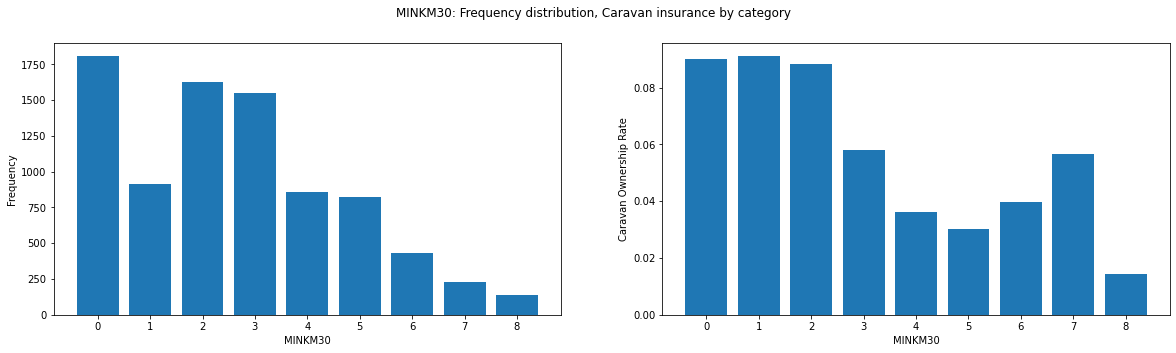

Variable MINKM30 has a correlation of -0.0884 with the target, p = 0.0

 



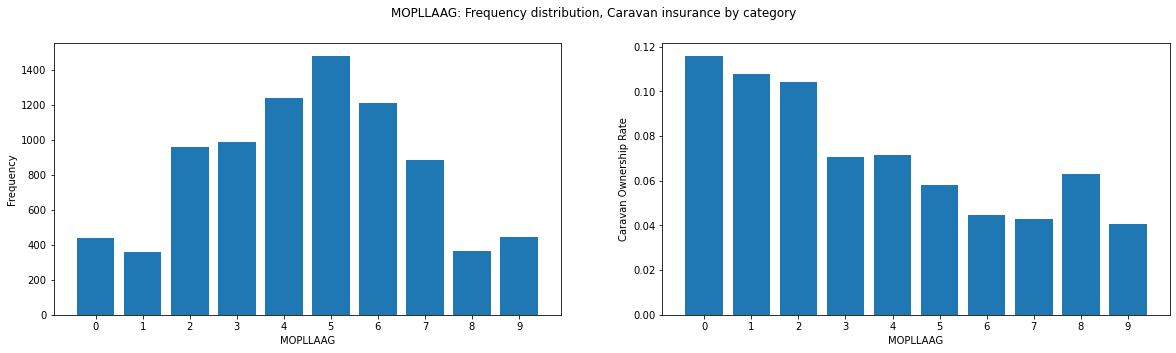

Variable MOPLLAAG has a correlation of -0.0845 with the target, p = 0.0

 



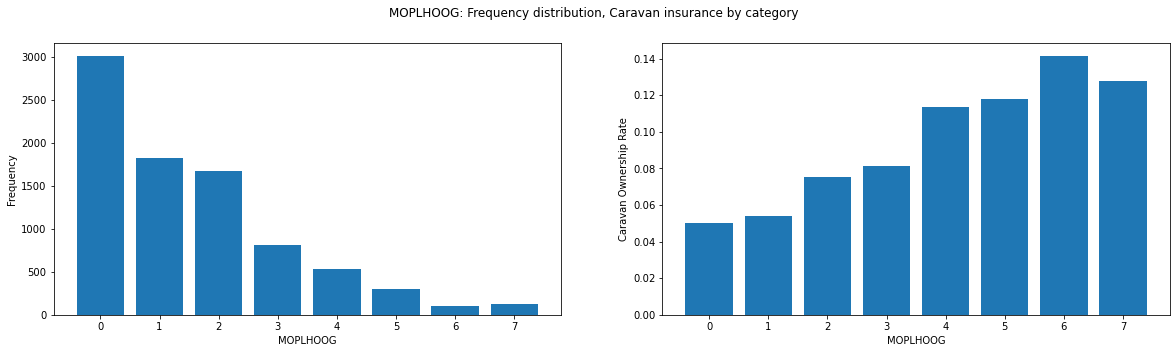

Variable MOPLHOOG has a correlation of 0.081 with the target, p = 0.0

 



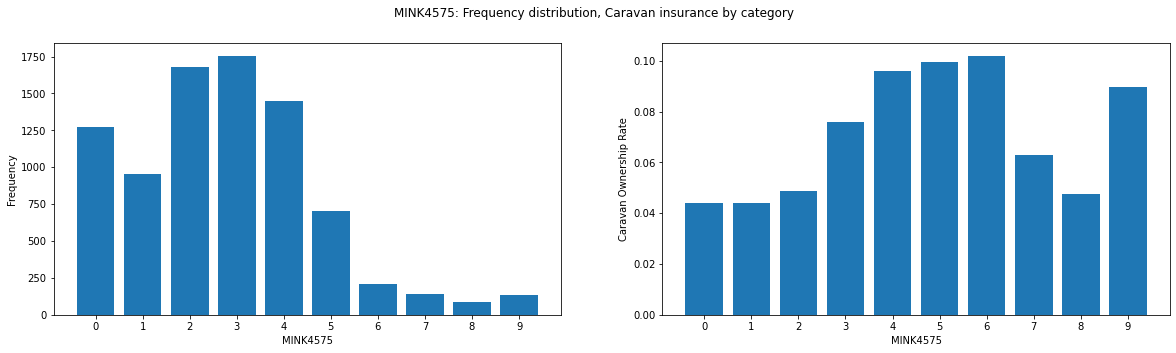

Variable MINK4575 has a correlation of 0.0794 with the target, p = 0.0

 



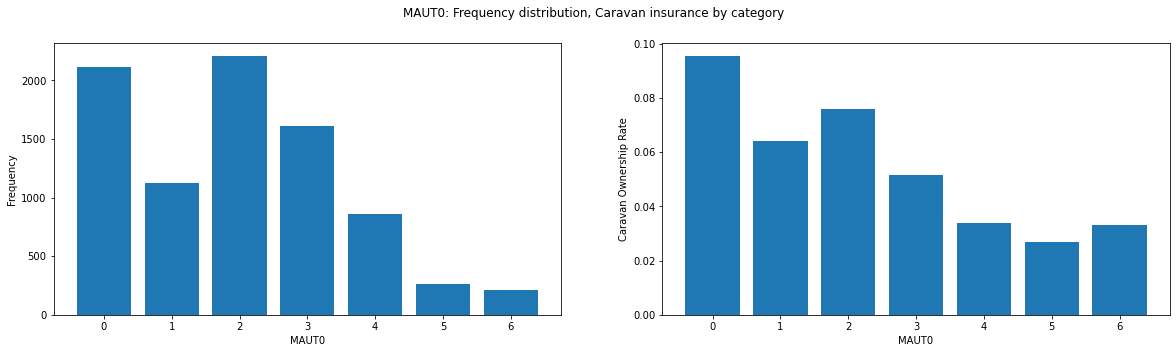

Variable MAUT0 has a correlation of -0.0792 with the target, p = 0.0

 



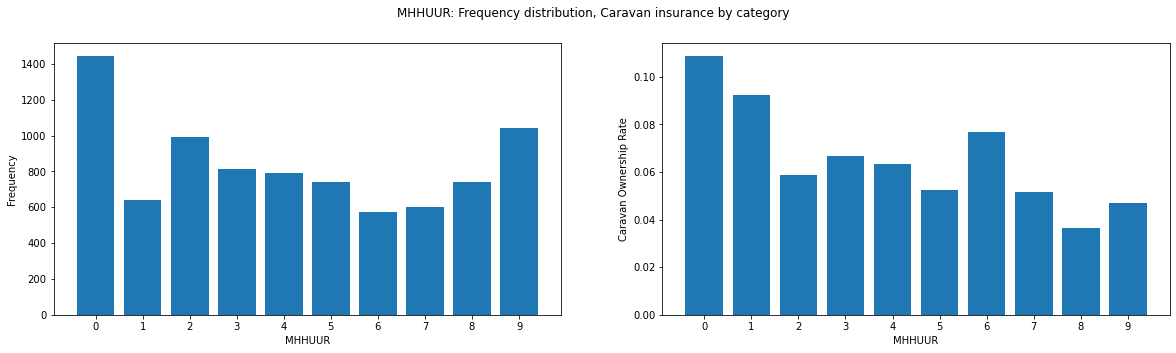

Variable MHHUUR has a correlation of -0.0779 with the target, p = 0.0

 



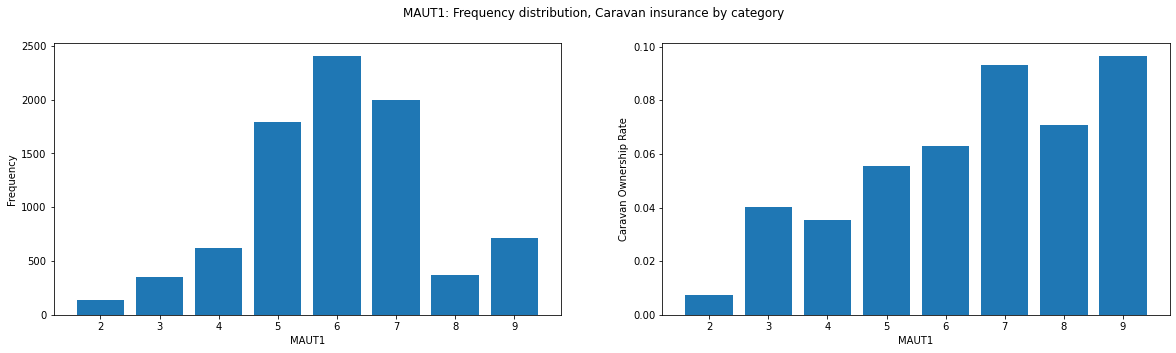

Variable MAUT1 has a correlation of 0.0763 with the target, p = 0.0

 



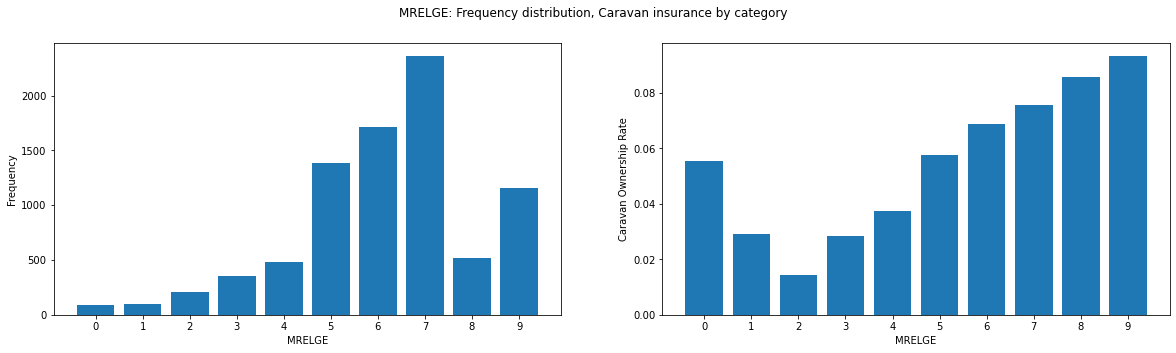

Variable MRELGE has a correlation of 0.07 with the target, p = 0.0

 



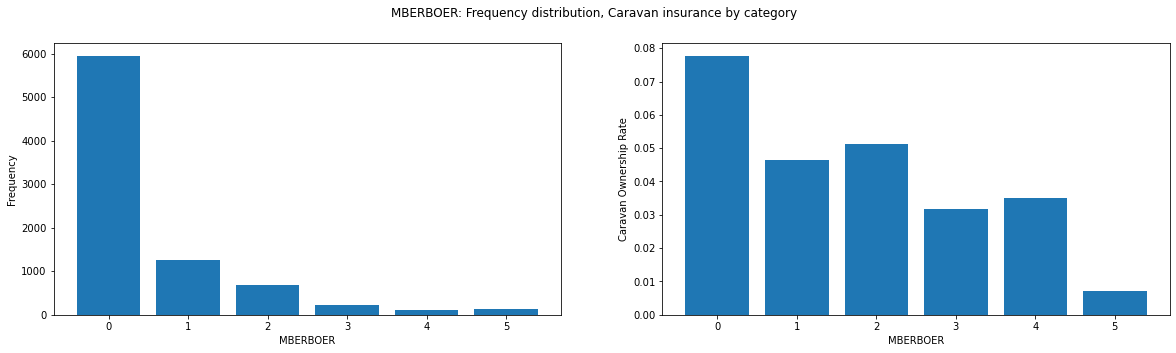

Variable MBERBOER has a correlation of -0.0628 with the target, p = 0.0

 



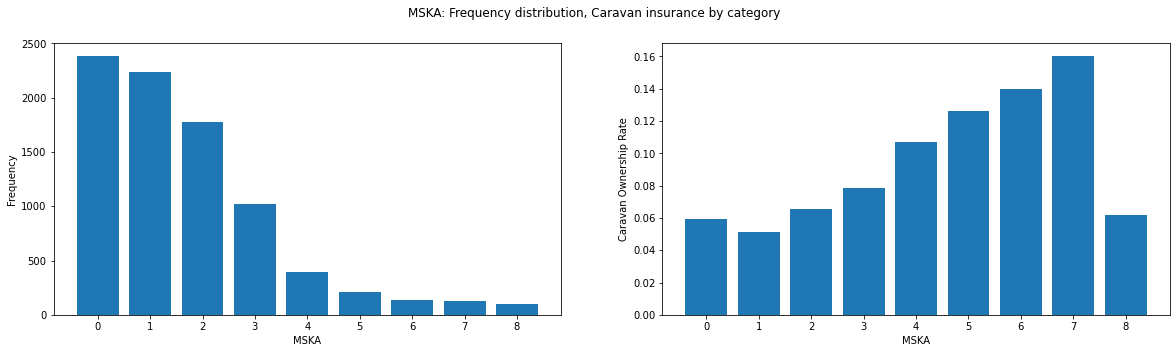

Variable MSKA has a correlation of 0.0588 with the target, p = 0.0

 



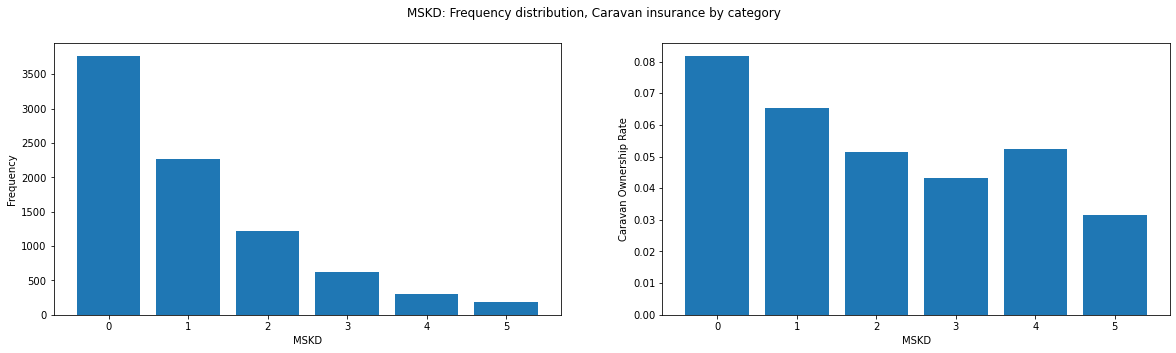

Variable MSKD has a correlation of -0.057 with the target, p = 0.0

 



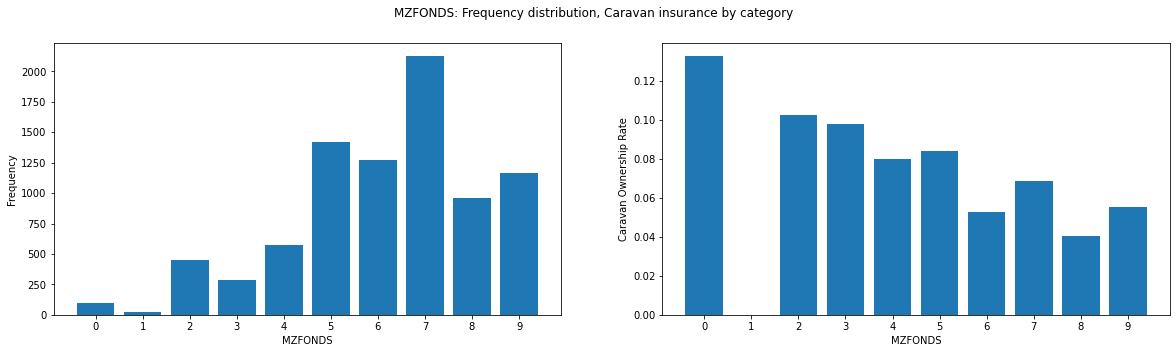

Variable MZFONDS has a correlation of -0.0562 with the target, p = 0.0

 



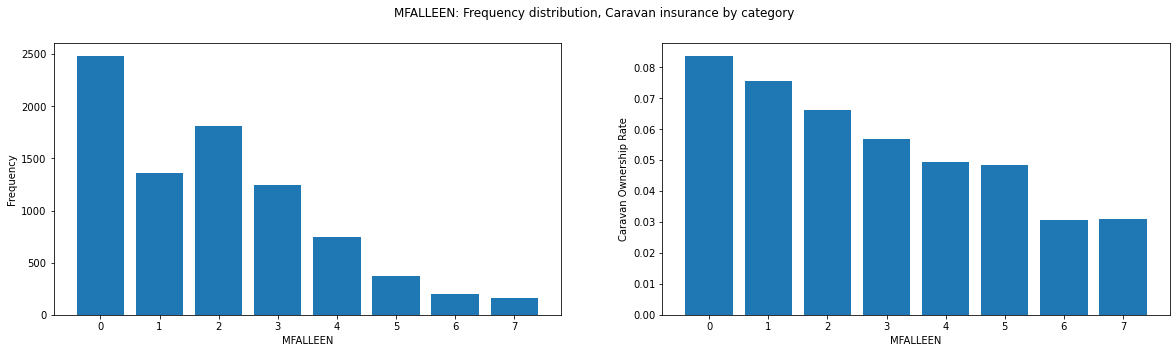

Variable MFALLEEN has a correlation of -0.056 with the target, p = 0.0

 



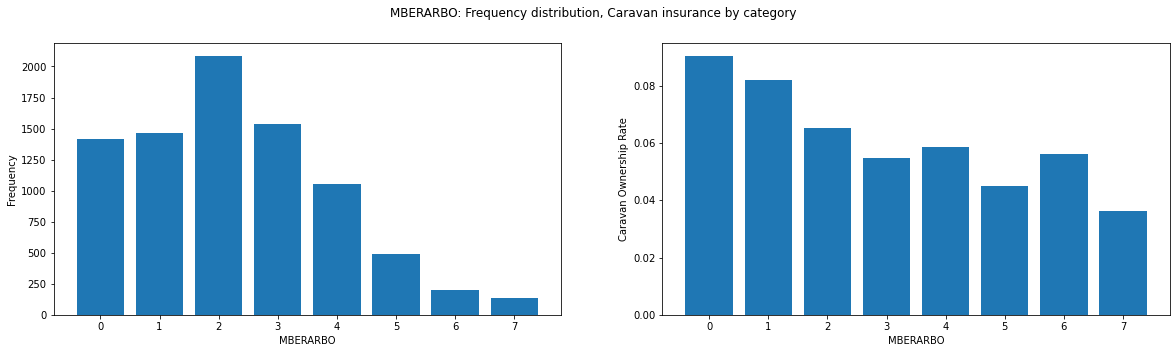

Variable MBERARBO has a correlation of -0.0555 with the target, p = 0.0

 



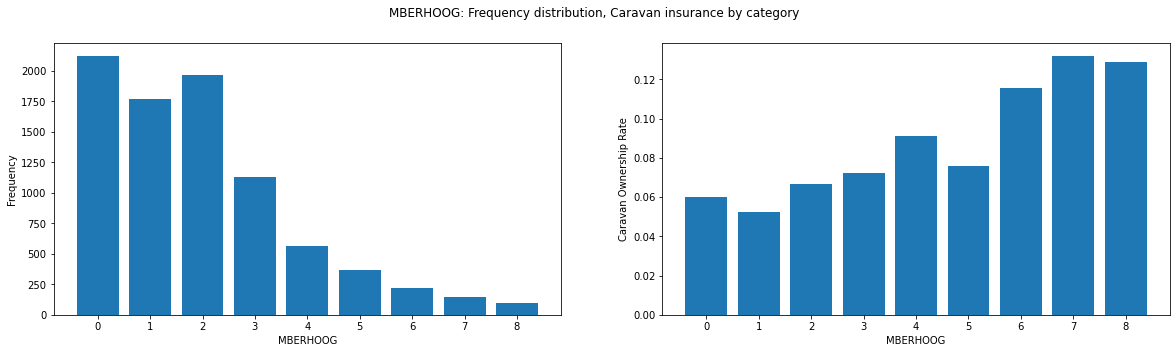

Variable MBERHOOG has a correlation of 0.0494 with the target, p = 0.0

 



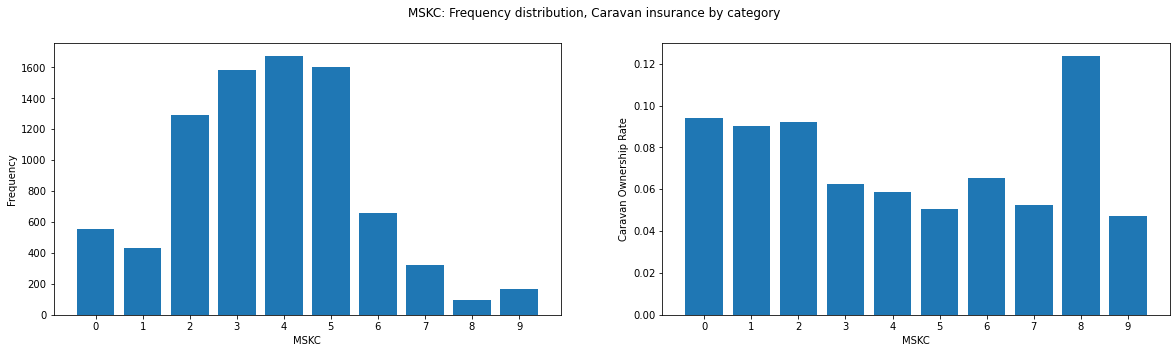

Variable MSKC has a correlation of -0.0488 with the target, p = 0.0

 



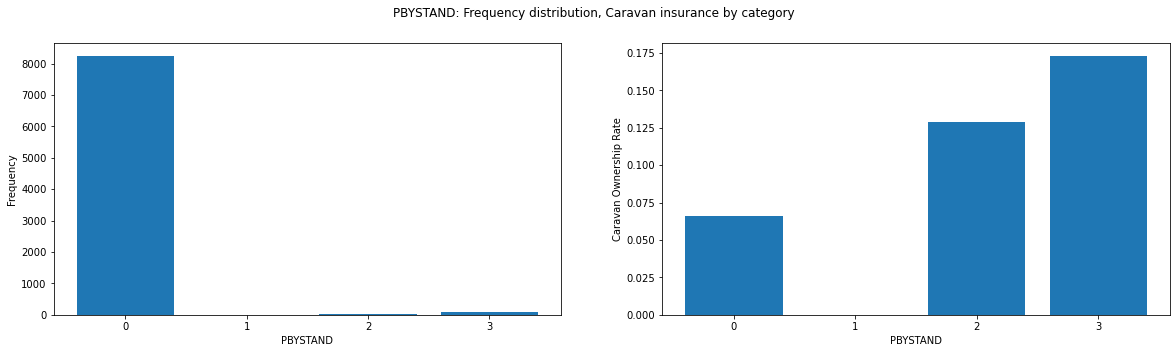

Variable PBYSTAND has a correlation of 0.0485 with the target, p = 0.0

 



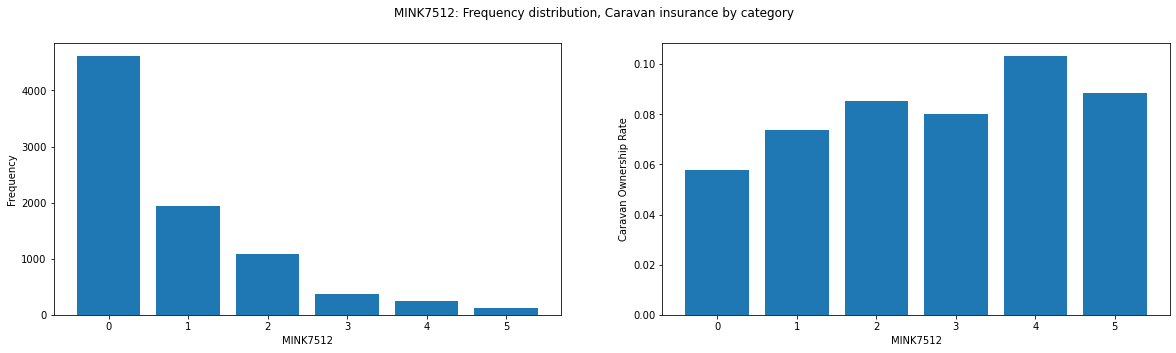

Variable MINK7512 has a correlation of 0.0482 with the target, p = 0.0

 



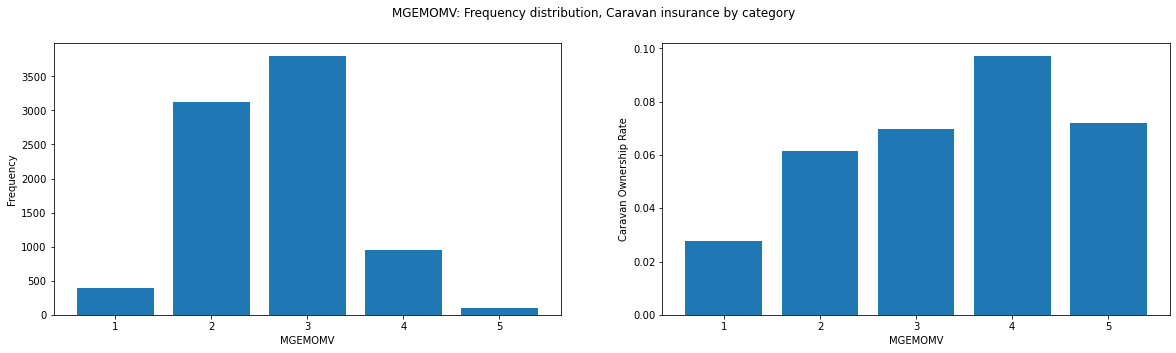

Variable MGEMOMV has a correlation of 0.0469 with the target, p = 0.0

 



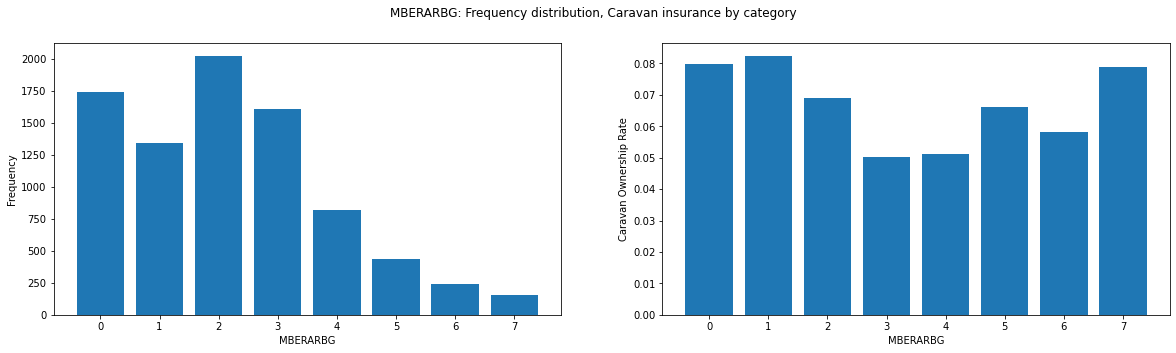

Variable MBERARBG has a correlation of -0.0396 with the target, p = 0.0003

 



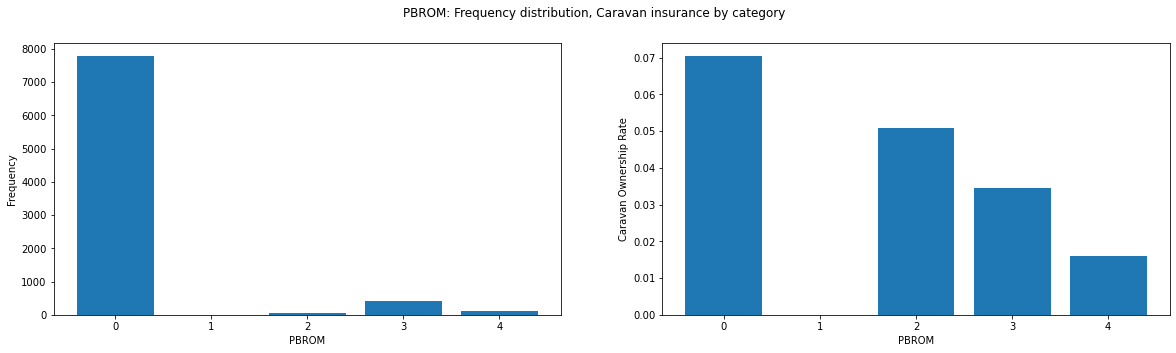

Variable PBROM has a correlation of -0.0393 with the target, p = 0.0003

 



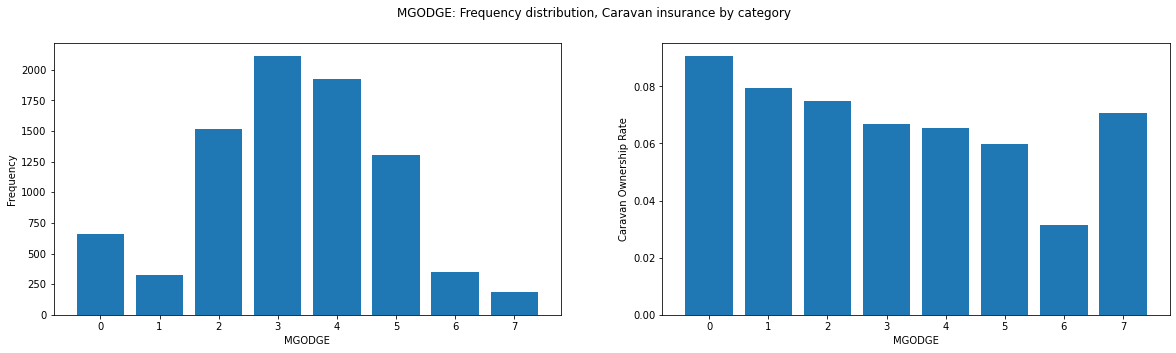

Variable MGODGE has a correlation of -0.036 with the target, p = 0.001

 



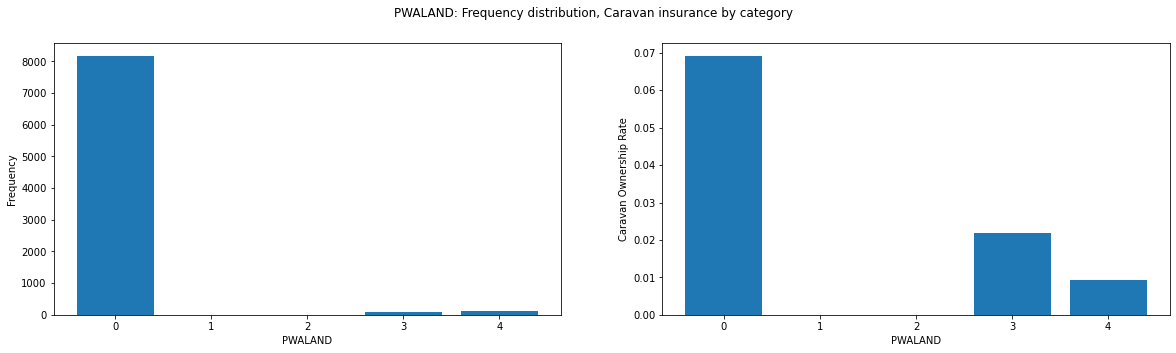

Variable PWALAND has a correlation of -0.034 with the target, p = 0.0018

 



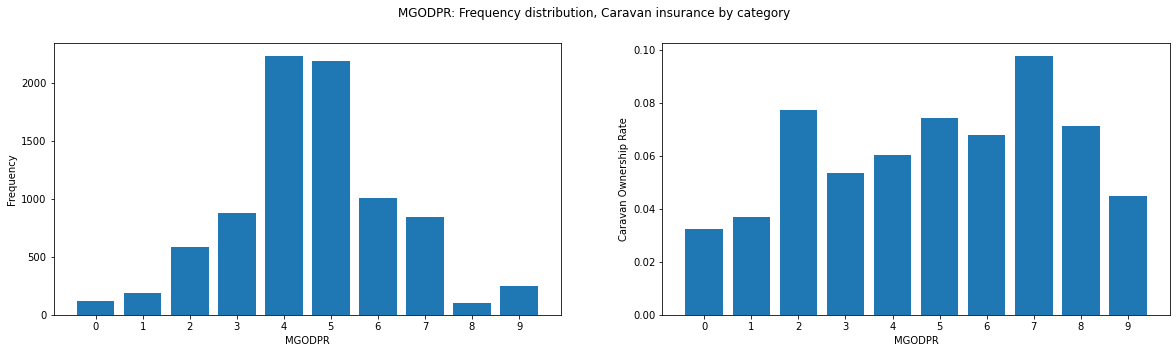

Variable MGODPR has a correlation of 0.0313 with the target, p = 0.0042

 



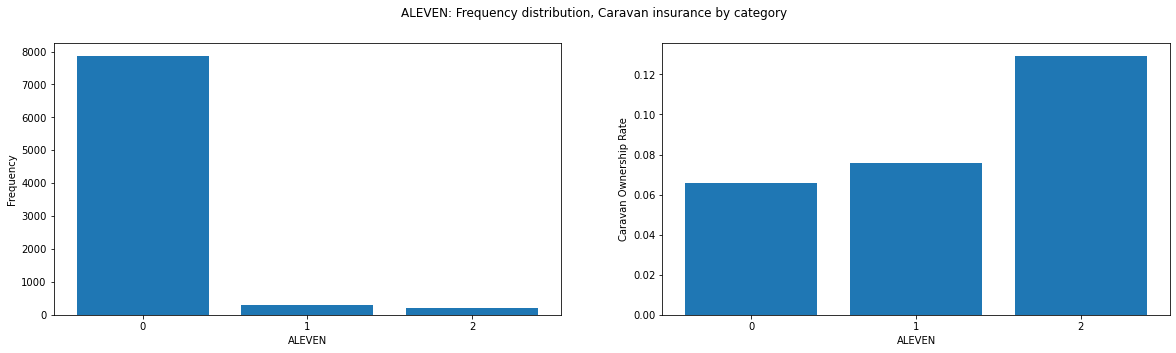

Variable ALEVEN has a correlation of 0.0309 with the target, p = 0.0046

 



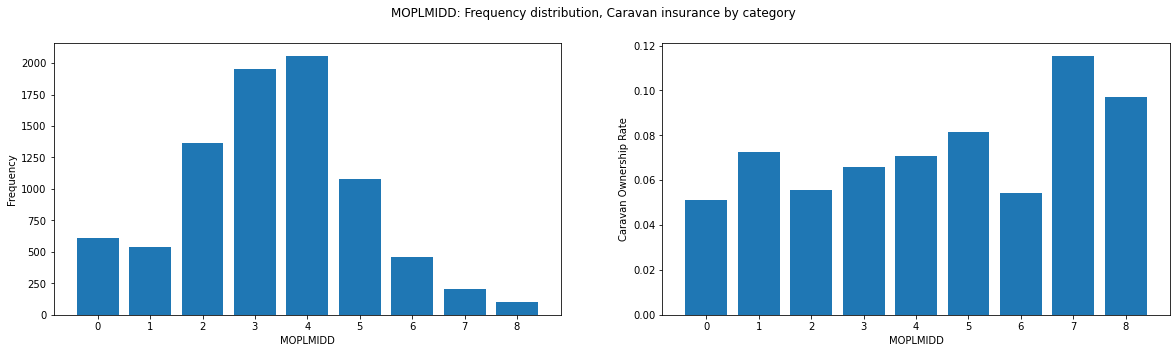

Variable MOPLMIDD has a correlation of 0.0307 with the target, p = 0.005

 



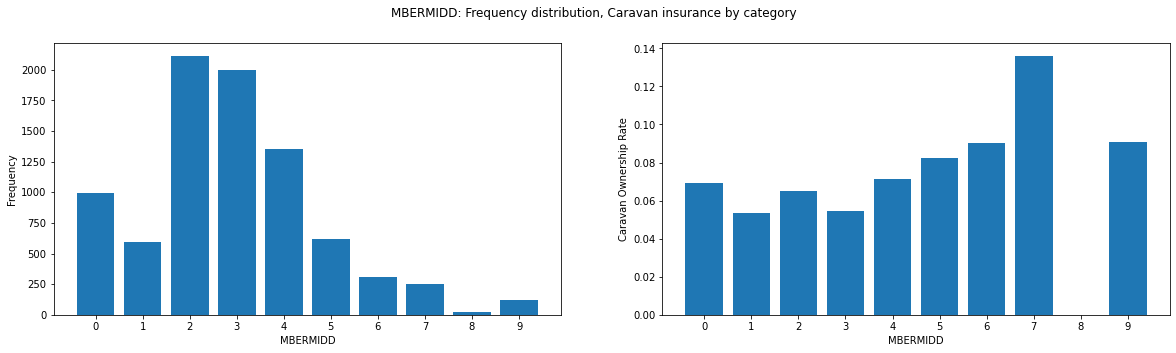

Variable MBERMIDD has a correlation of 0.0304 with the target, p = 0.0054

 



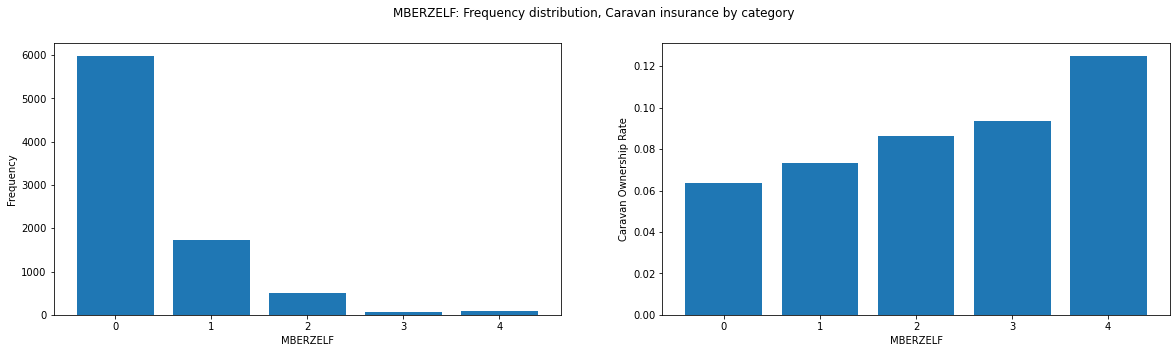

Variable MBERZELF has a correlation of 0.0295 with the target, p = 0.0069

 



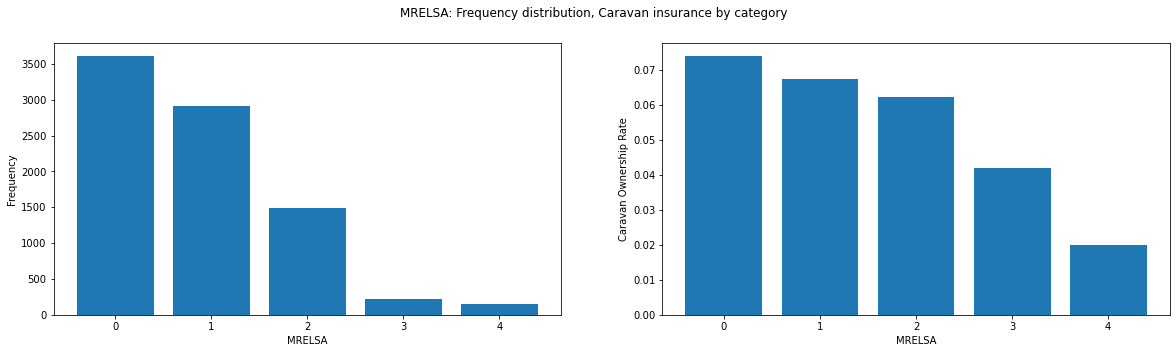

Variable MRELSA has a correlation of -0.0276 with the target, p = 0.0116

 



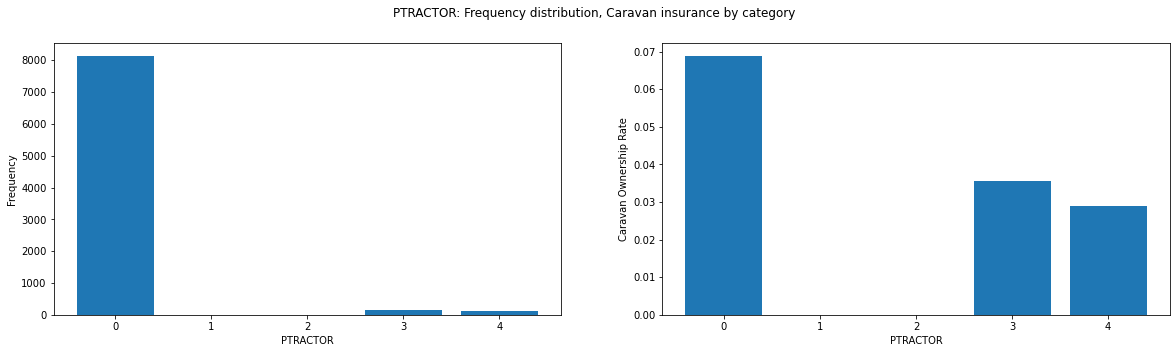

Variable PTRACTOR has a correlation of -0.0241 with the target, p = 0.0271

 



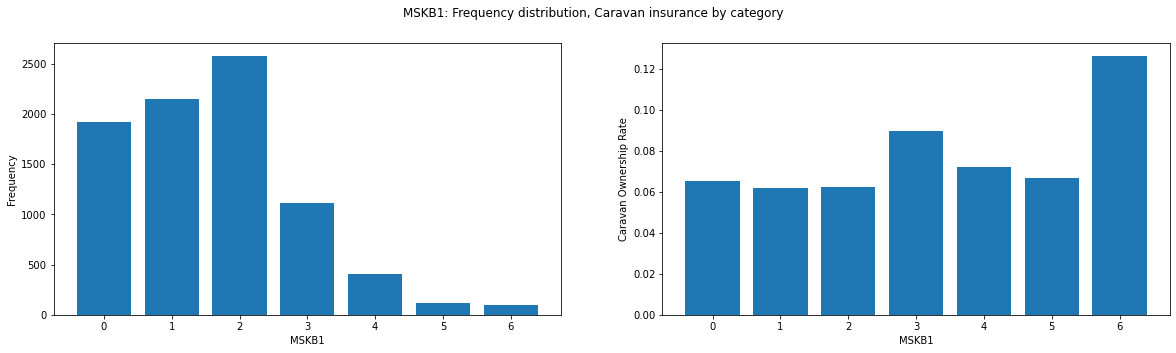

Variable MSKB1 has a correlation of 0.0239 with the target, p = 0.0289

 



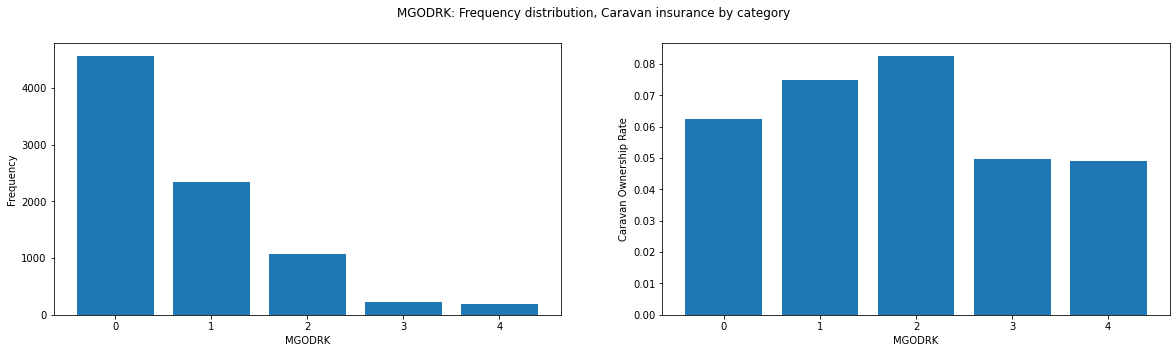

Variable MGODRK has a correlation of 0.0205 with the target, p = 0.0607

 



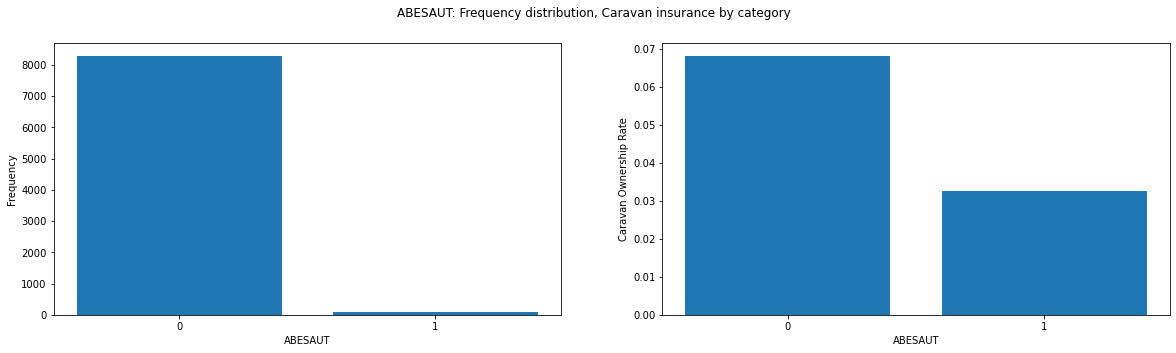

Variable ABESAUT has a correlation of -0.0147 with the target, p = 0.1771

 



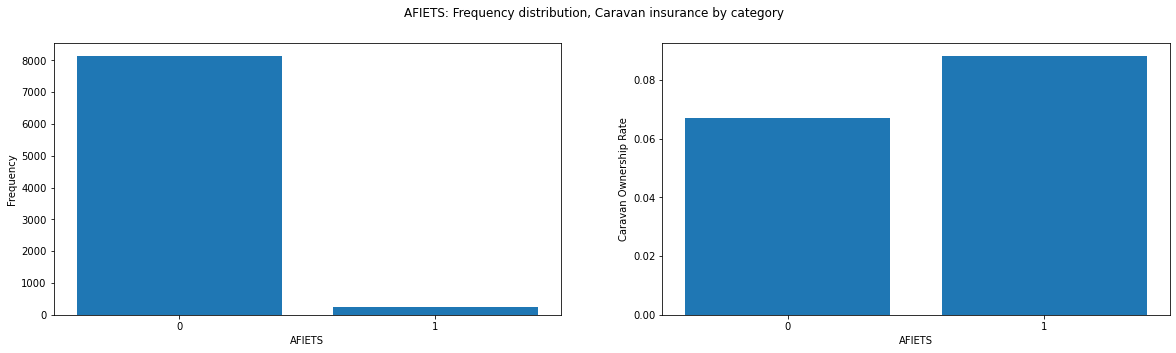

Variable AFIETS has a correlation of 0.0139 with the target, p = 0.2031

 



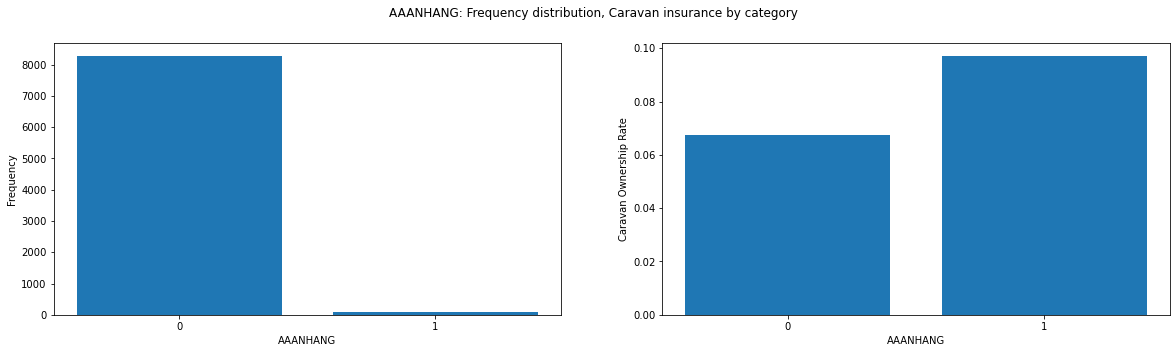

Variable AAANHANG has a correlation of 0.013 with the target, p = 0.234

 



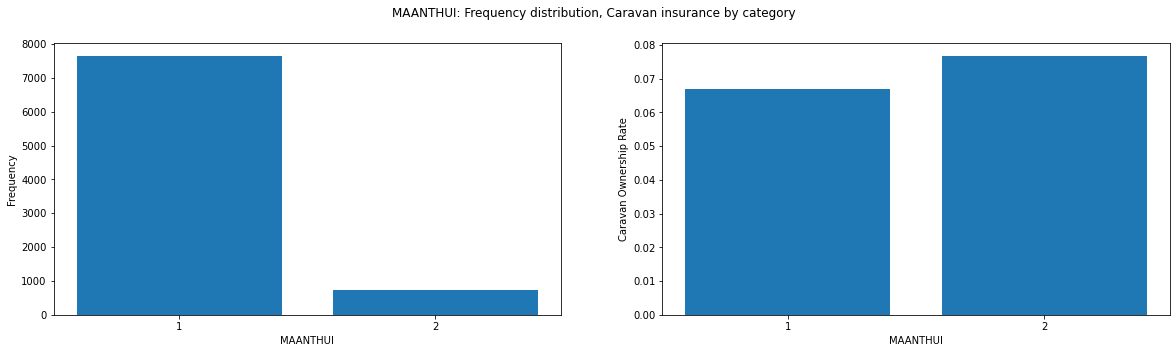

Variable MAANTHUI has a correlation of 0.011 with the target, p = 0.3155

 



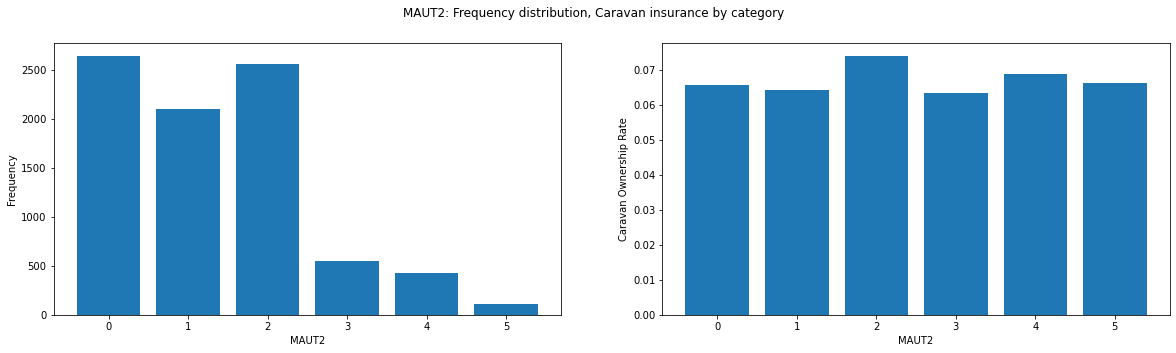

Variable MAUT2 has a correlation of 0.0086 with the target, p = 0.4333

 



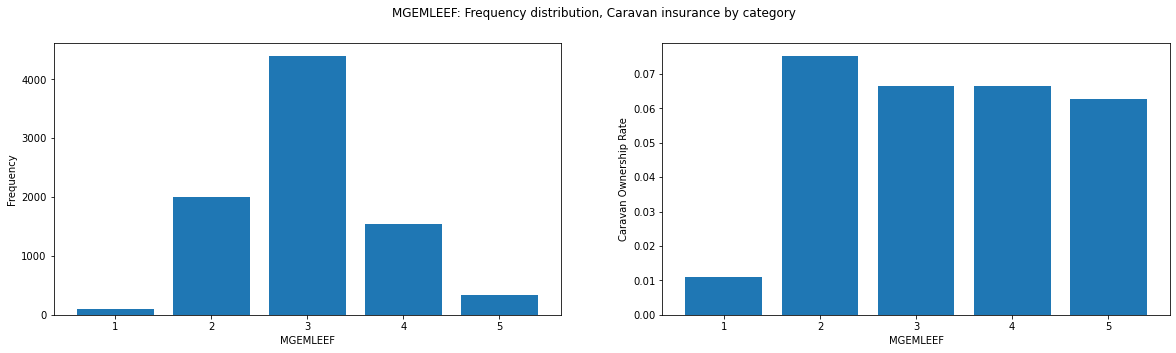

Variable MGEMLEEF has a correlation of -0.0082 with the target, p = 0.4546

 



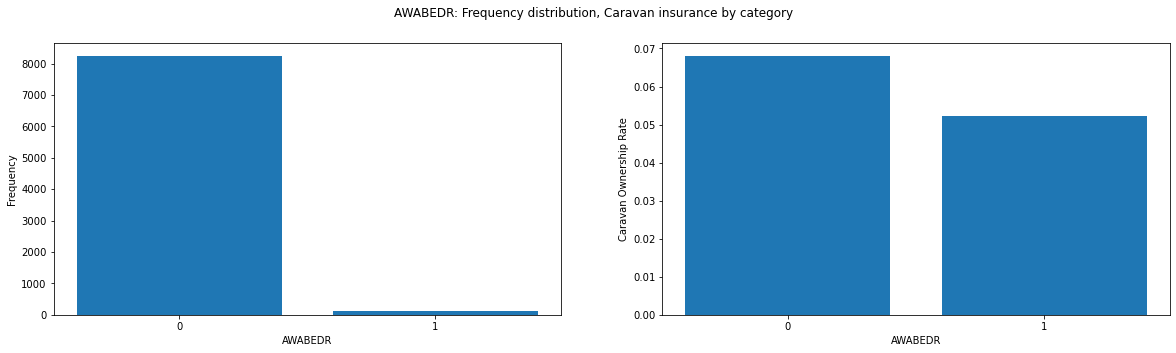

Variable AWABEDR has a correlation of -0.0079 with the target, p = 0.4705

 



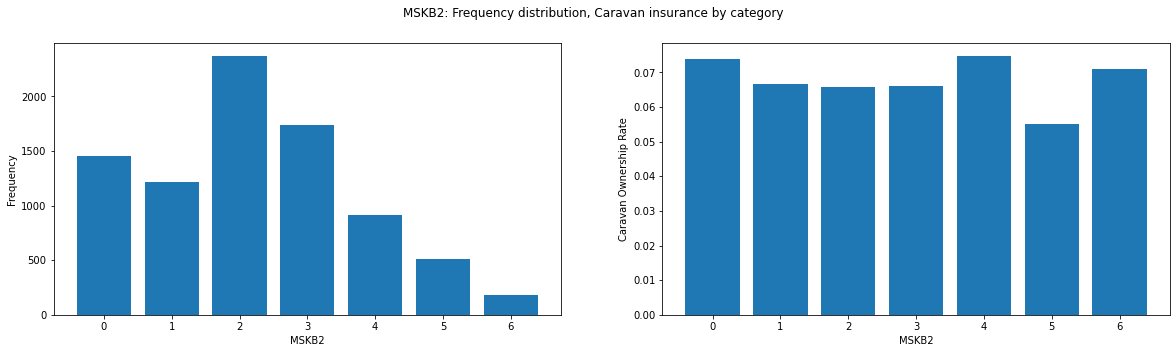

Variable MSKB2 has a correlation of -0.0066 with the target, p = 0.5468

 



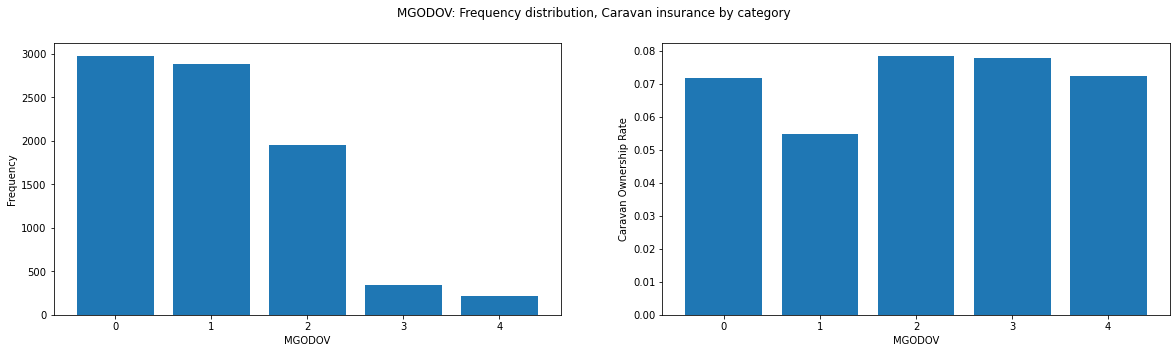

Variable MGODOV has a correlation of 0.0064 with the target, p = 0.555

 



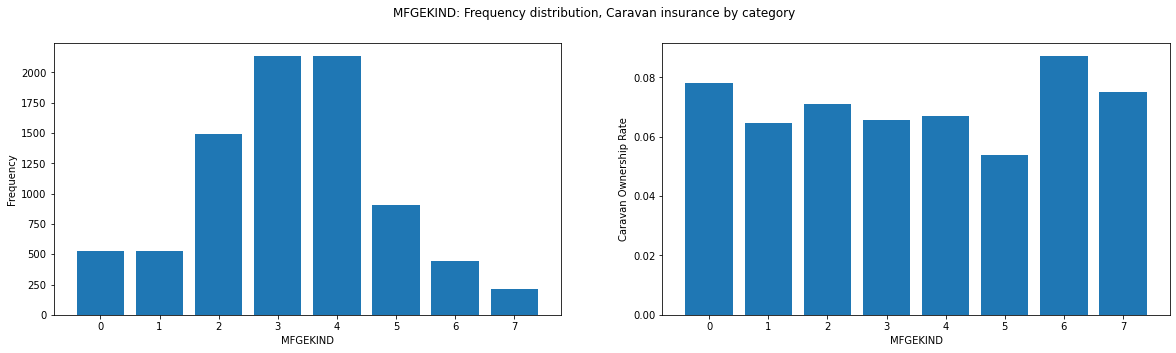

Variable MFGEKIND has a correlation of -0.0055 with the target, p = 0.6166

 



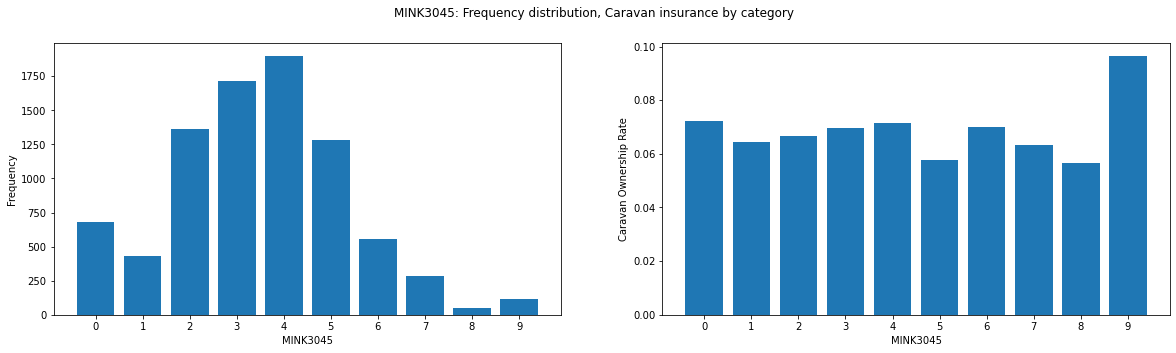

Variable MINK3045 has a correlation of -0.0042 with the target, p = 0.7029

 



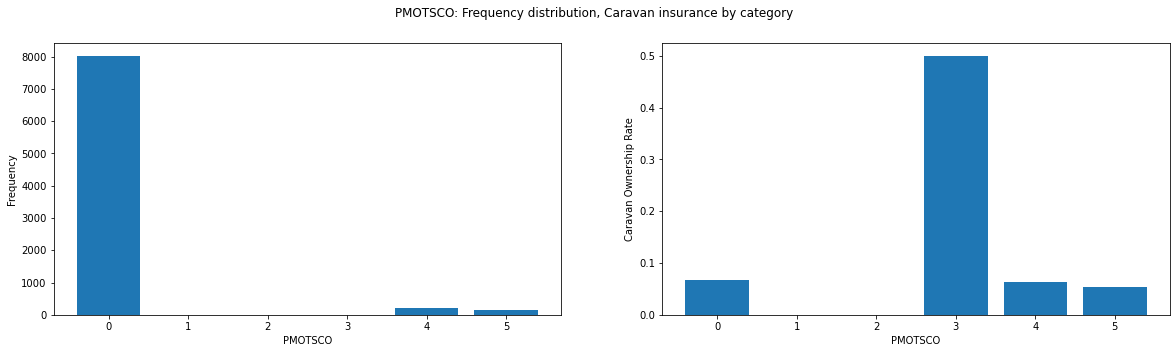

Variable PMOTSCO has a correlation of -0.0036 with the target, p = 0.7451

 



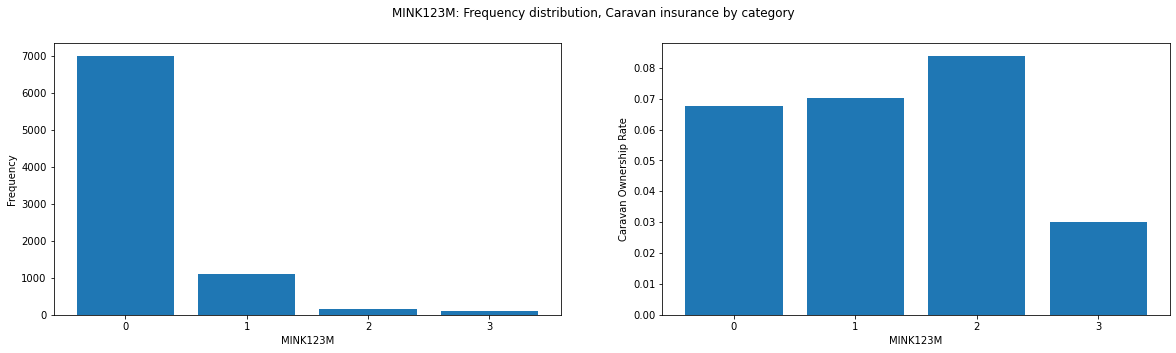

Variable MINK123M has a correlation of 0.0016 with the target, p = 0.8839

 



In [45]:
# Investigate variables in order of descending absolute correlation
# with the target.
sorted_kept = target_cor_keep.index.tolist()

# Create barplots and print out correlation information
for var in sorted_kept:
    visualize(var)
    report_result(var, target_cor_keep)
    print('\n', '\n')

### Summary of findings so far

We note that not all of features have statistically significant correlations
with the target, but many do!

In [46]:
num_sig = target_cor_keep.loc[target_cor_keep['pval'] < 0.05].shape[0]
print('There is a statistically significant correlation with caravan \
insurance ownership for {} ordinal features'.format(num_sig))

There is a statistically significant correlation with caravan insurance ownership for 36 ordinal features


Our top five ordinal predictors are:
- PPERSAUT: Contribution to car policies (positive correlation)
- MKOOPLA: Purchasing power class (positive correlation)
- MINKGEM: Average income (positive correlation)
- PBRAND: Contribution to fire policies (positive correlation)
- PWAPART: Contribution to third-party insurance firms (positive correlation)

So it looks like people who contribute more to other insurance products are also more likely to purchase caravan insurance. This seems logical enough!

## Distributions and caravan insurance ownership rates by category, nominal variables

We have only two nominal variables. The variable 'MOSHFOOD' breaks customers down into 10 classes, while 
For each variable, we plot bar graphs showing the frequency of each level, and the we will use a $ \chi $-squared test to determine whether the variable has a meaningful association with caravan insurance ownership.

In [47]:
from scipy.stats import chi2_contingency

In [48]:
# Function to report results of chi-squared test of independence
# between levels of a categorical variable and 
# Caravan insurance ownership in a nice format.

def report_chisq(col):  
    # Create contingence table
    counts = df[col].value_counts()
    counts = counts.sort_index()
    freqs1 = df.groupby(col)['CARAVAN'].sum()
    freqs2 = counts - freqs1
    table = np.array([freqs1.tolist(), freqs2.tolist()])

    # Run the chi-squared test, and report results
    chi2, pval, dof, exp = chi2_contingency(table)
    print('Chi-squared test for independence:')
    print('test statistic:', round(chi2, 2))
    print('p-value:', round(pval, 6))
    
    # Smallest expected frequency should be greater than 5
    too_small = (exp < 0).sum()
    print('There are {} cells with \
expected frequencies less than 5.'.format(too_small))

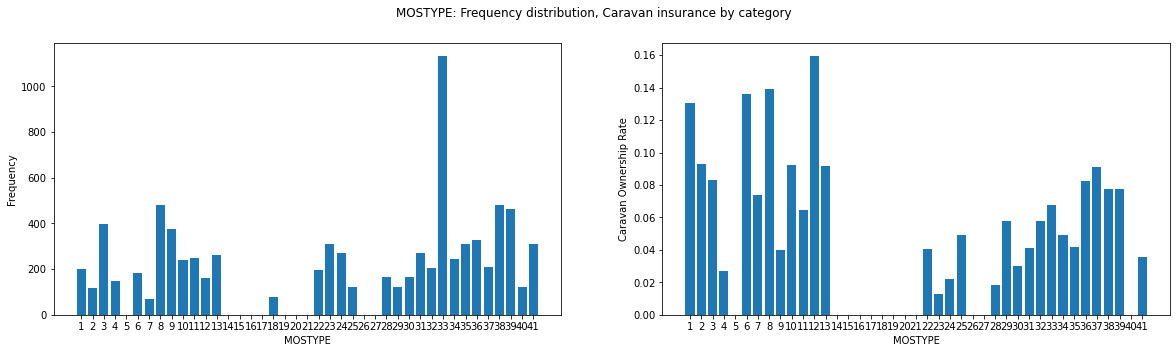

Chi-squared test for independence:
test statistic: 170.81
p-value: 0.0
There are 0 cells with expected frequencies less than 5.






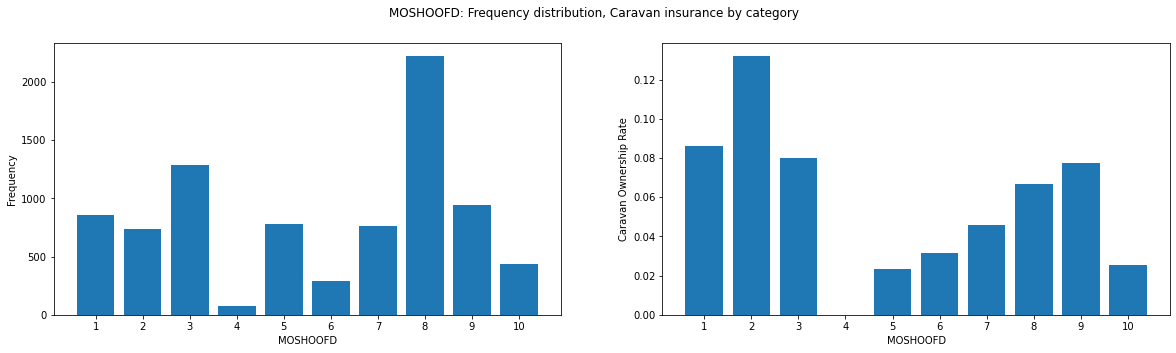

Chi-squared test for independence:
test statistic: 111.21
p-value: 0.0
There are 0 cells with expected frequencies less than 5.






In [49]:
for col in nominal:
    visualize(col)
    report_chisq(col)
    print('\n')
    print('\n')

Both customer type and customer subtype appear to have statistically-significant associations with the target variable. This should be taken with a grain of salt, because there are some 0's in the contingency table, which according to some texts means this test should not be used.

It appears that owning caravan insurance is most common for those in customer type 2, described in the codebook as 'Driven Growers'. The subtype most likely to carry caravan insurance is 'Affluent Young Families.' Caravan insurance appears to be a luxury product, which is most appealing to higher-income people. Owning a caravan may be appealing for young families with children, and less so for older people. None of the so-called 'Career Loners' (customer type 4) have caravan insurance.